#### installing dependencies, it is better to run each in diffrent cell

In [ ]:
pip install surprise

In [ ]:
!pip uninstall scikit-surprise -y
!pip uninstall numpy -y

In [ ]:
!pip install numpy==1.23.5
!pip install scikit-surprise --no-binary :all:
#restart the kurnul

In [ ]:
import numpy as np
import surprise

print(np.__version__)
print(surprise.__version__)

loading datasets:

In [26]:
import pandas as pd
# Ensure datasets are loaded (you might need to load these from files or define them)
df_final = pd.read_csv('../preprocessing/df_final.csv')  # Example, replace with actual loading method
df_40 = pd.read_csv('../preprocessing/df_40.csv')       
df_80 = pd.read_csv('../preprocessing/df_80.csv')       
df_120 = pd.read_csv('../preprocessing/df_120.csv')     
df_cluster = pd.read_csv('../preprocessing/df_cluster.csv') 
df_cluster_0_top = pd.read_csv('../preprocessing/cluster_0_users.csv')
df_cluster_1_top = pd.read_csv('../preprocessing/cluster_1_users.csv')
df_cluster_2_top = pd.read_csv('../preprocessing/cluster_2_users.csv')


In [4]:
df_cluster_0_top

,user_id,cluster,entropy
0,544,0,0.000000
1,801,0,0.000000
2,205,0,0.000000
3,206,0,0.000000
4,572,0,0.000000
...,...,...,...
310,736,0,0.286836
311,443,0,0.286836
312,649,0,0.286836
313,223,0,0.290457


In [ ]:
import pandas as pd
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import KFold
import time

# Function to load the dataset and perform SVD
def load_and_run_svd(train_df, test_df, dataset_name):
    reader = Reader(rating_scale=(0, 5))
    train_data = Dataset.load_from_df(train_df[['user_id', 'item_id', 'rating']], reader)
    test_data = Dataset.load_from_df(test_df[['user_id', 'item_id', 'rating']], reader)

    kf = KFold(n_splits=5, random_state=42, shuffle=True)

    total_mse = 0
    total_rmse = 0
    total_mae = 0

    for fold, (trainset, _) in enumerate(kf.split(train_data), 1):
        model = SVD()
        model.fit(trainset)
        
        # Build test set from test_df
        testset = [(uid, iid, r) for (uid, iid, r) in zip(test_df['user_id'], test_df['item_id'], test_df['rating'])]
        predictions = model.test(testset)

        mse = accuracy.mse(predictions)
        rmse = accuracy.rmse(predictions)
        mae = accuracy.mae(predictions)

        total_mse += mse
        total_rmse += rmse
        total_mae += mae

    avg_mse = total_mse / 5
    avg_rmse = total_rmse / 5
    avg_mae = total_mae / 5

    print(f"{dataset_name} -> MSE: {avg_mse}, RMSE: {avg_rmse}, MAE: {avg_mae}")
# Load the datasets
df_943 = df_final
df_983 = df_40
df_1023 = df_80
df_1063 = df_120

# Train on 943, test on 943
load_and_run_svd(df_943, df_943, '943 Train, 943 Test')

# Train on 983, test on 943
load_and_run_svd(df_983, df_943, '983 Train, 943 Test')

# Train on 1023, test on 943
load_and_run_svd(df_1023, df_943, '1023 Train, 943 Test')

# Train on 1063, test on 943
load_and_run_svd(df_1063, df_943, '1063 Train, 943 Test')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import KFold
import time

# Function to load the dataset and perform SVD
def load_and_run_svd(train_df, test_df, dataset_name):
    reader = Reader(rating_scale=(0, 5))
    train_data = Dataset.load_from_df(train_df[['user_id', 'item_id', 'rating']], reader)
    test_data = Dataset.load_from_df(test_df[['user_id', 'item_id', 'rating']], reader)

    kf = KFold(n_splits=5, random_state=42, shuffle=True)

    mse_values = []
    rmse_values = []
    mae_values = []

    for fold, (trainset, _) in enumerate(kf.split(train_data), 1):
        model = SVD()
        model.fit(trainset)
        testset = test_data.build_full_trainset().build_testset()
        predictions = model.test(testset)

        mse = accuracy.mse(predictions)
        rmse = accuracy.rmse(predictions)
        mae = accuracy.mae(predictions)

        mse_values.append(mse)
        rmse_values.append(rmse)
        mae_values.append(mae)
    avg_mse = sum(mse_values) / len(mse_values)
    avg_rmse = sum(rmse_values) / len(rmse_values)
    avg_mae = sum(mae_values) / len(mae_values)

    print(f"{dataset_name} -> MSE: {avg_mse}, RMSE: {avg_rmse}, MAE: {avg_mae}")

    # Visualization of the first 50 datapoints
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 2, 1)
    plt.plot(mse_values[:50], label='MSE', color='blue')
    plt.title(f'{dataset_name} - First 50 MSE')
    plt.xlabel('Fold')
    plt.ylabel('MSE')

    plt.subplot(2, 2, 2)
    plt.plot(rmse_values[:50], label='RMSE', color='red')
    plt.title(f'{dataset_name} - First 50 RMSE')
    plt.xlabel('Fold')
    plt.ylabel('RMSE')

    plt.subplot(2, 2, 3)
    plt.plot(mae_values[:50], label='MAE', color='green')
    plt.title(f'{dataset_name} - First 50 MAE')
    plt.xlabel('Fold')
    plt.ylabel('MAE')

    plt.tight_layout()
    plt.show()

# Load the datasets
df_943 = df_final
df_983 = df_40
df_1023 = df_80
df_1063 = df_120

# Train on 943, test on 943
load_and_run_svd(df_943, df_943, '943 Train, 943 Test')

# Train on 983, test on 943
load_and_run_svd(df_983, df_943, '983 Train, 943 Test')

# Train on 1023, test on 943
load_and_run_svd(df_1023, df_943, '1023 Train, 943 Test')

# Train on 1063, test on 943
load_and_run_svd(df_1063, df_943, '1063 Train, 943 Test')


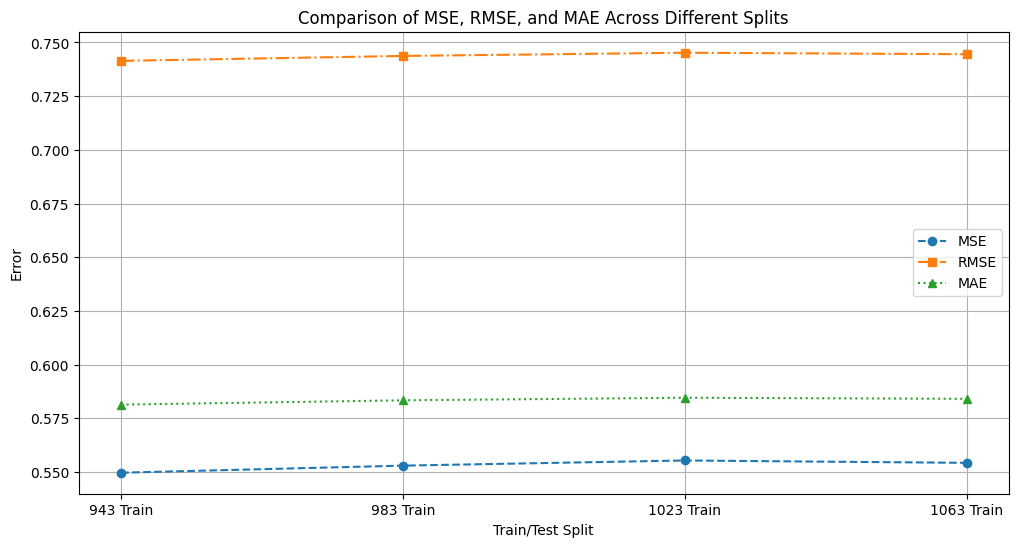

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for train/test splits
splits = ['943 Train', '983 Train', '1023 Train', '1063 Train']

# MSE, RMSE, and MAE values
mse_values = [0.5497, 0.5530, 0.5554, 0.5543]
rmse_values = [0.7414, 0.7437, 0.7452, 0.7445]
mae_values = [0.5814, 0.5834, 0.5846, 0.5841]

x = np.arange(len(splits))  # X-axis positions

# Plot MSE
plt.figure(figsize=(12, 6))
plt.plot(x, mse_values, marker='o', label='MSE', linestyle='--')
plt.plot(x, rmse_values, marker='s', label='RMSE', linestyle='-.')
plt.plot(x, mae_values, marker='^', label='MAE', linestyle=':')

# Add labels and title
plt.xticks(x, splits)
plt.xlabel('Train/Test Split')
plt.ylabel('Error')
plt.title('Comparison of MSE, RMSE, and MAE Across Different Splits')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# here

In [ ]:
print("===== Entropy Summary for Each Cluster =====\n")

print("🔷 Cluster 0")

print(f"Min entropy:  {df_cluster_0_top['entropy'].min():.4f}")
print(f"Max entropy:  {df_cluster_0_top['entropy'].max():.4f}")
print(f"Mean entropy: {df_cluster_0_top['entropy'].mean():.4f}\n")

print("🔶 Cluster 1")

print(f"Min entropy:  {df_cluster_1_top['entropy'].min():.4f}")
print(f"Max entropy:  {df_cluster_1_top['entropy'].max():.4f}")
print(f"Mean entropy: {df_cluster_1_top['entropy'].mean():.4f}\n")

print("🔴 Cluster 2")

print(f"Min entropy:  {df_cluster_2_top['entropy'].min():.4f}")
print(f"Max entropy:  {df_cluster_2_top['entropy'].max():.4f}")
print(f"Mean entropy: {df_cluster_2_top['entropy'].mean():.4f}")

===== Entropy Summary for Each Cluster =====

🔷 Cluster 0
Min entropy:  0.0000
Max entropy:  0.2954
Mean entropy: 0.0757

🔶 Cluster 1
Min entropy:  0.3027
Max entropy:  1.0947
Mean entropy: 0.7589

🔴 Cluster 2
Min entropy:  1.0948
Max entropy:  1.8756
Mean entropy: 1.3989


In [7]:
# ===== Step 0: Display the full df_cluster =====
print("📄 Full df_cluster:")
print(df_cluster.head())  # You can change to df_cluster.tail() or df_cluster if needed

# ===== Step 1: Count number of users per cluster =====
user_counts = df_cluster['cluster'].value_counts().sort_index()
print("\n📊 Users per cluster:")
print(user_counts)

# ===== Step 2: Sample 15 example user_ids per cluster (if possible) =====
example_users = (
    df_cluster.groupby('cluster')['user_id']
    .apply(lambda x: x.sample(n=15, random_state=11) if len(x) >= 15 else x)
    .reset_index()
)

# ===== Step 3: Display example users per cluster =====
print("\n🎯 15 example user_ids per cluster:")
for cluster in sorted(example_users['cluster'].unique()):
    user_list = example_users[example_users['cluster'] == cluster]['user_id'].tolist()
    print(f"Cluster {cluster}: {user_list}")


📄 Full df_cluster:
   user_id  cluster  entropy
0      544        0      0.0
1      801        0      0.0
2      205        0      0.0
3      206        0      0.0
4      572        0      0.0

📊 Users per cluster:
cluster
0    315
1    314
2    314
Name: count, dtype: int64

🎯 15 example user_ids per cluster:
Cluster 0: [179, 203, 39, 396, 772, 708, 547, 935, 834, 252, 730, 88, 646, 107, 818]
Cluster 1: [877, 342, 798, 591, 68, 152, 367, 658, 468, 894, 279, 417, 345, 329, 702]
Cluster 2: [870, 263, 6, 840, 248, 316, 421, 85, 275, 796, 406, 298, 479, 31, 12]


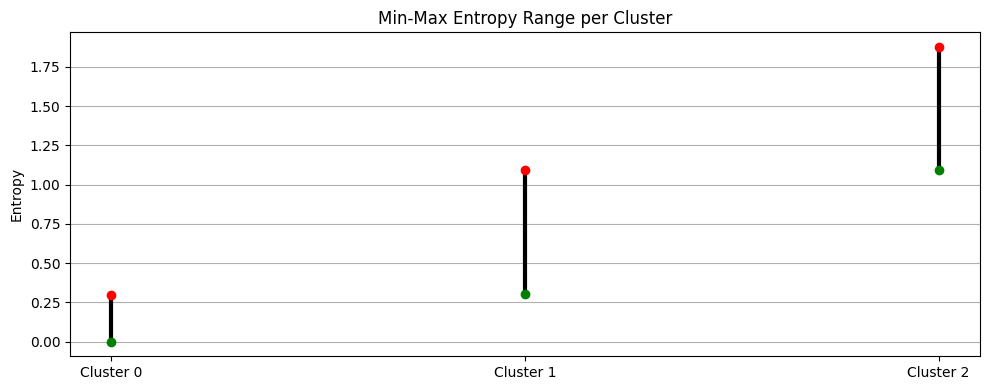

In [25]:
import matplotlib.pyplot as plt

# Define the entropy min and max for each cluster
clusters = ['Cluster 0', 'Cluster 1', 'Cluster 2']
min_entropy = [0.0000, 0.3027, 1.0948]
max_entropy = [0.2954, 1.0947, 1.8756]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 4))

# Plot min-max range for each cluster
for i, (cluster, min_val, max_val) in enumerate(zip(clusters, min_entropy, max_entropy)):
    ax.plot([i, i], [min_val, max_val], color='black', linewidth=3)
    ax.plot(i, min_val, 'go')  # Green dot for min
    ax.plot(i, max_val, 'ro')  # Red dot for max

# Customize plot
ax.set_xticks(range(len(clusters)))
ax.set_xticklabels(clusters)
ax.set_ylabel("Entropy")
ax.set_title("Min-Max Entropy Range per Cluster")
ax.grid(True, axis='y')

# Show the plot
plt.tight_layout()
plt.show()


In [36]:
df_cluster_0_top

,user_id,cluster,entropy
0,544,0,0.000000
1,801,0,0.000000
2,205,0,0.000000
3,206,0,0.000000
4,572,0,0.000000
...,...,...,...
310,736,0,0.286836
311,443,0,0.286836
312,649,0,0.286836
313,223,0,0.290457


### generating top 15 recommandation to users based on 4 diffrent datasets(original+ 3 biased)


In [ ]:
# Import the required libraries
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds

# Define a function to apply SVD and generate top 15 recommendations for all users
def generate_top15_recommendations(df):
    # Create the user-item matrix
    user_item_matrix = df.pivot(index='user_id', columns='item_id', values='rating').fillna(0)

    # Convert user-item matrix to a sparse matrix
    user_item_matrix_sparse = csr_matrix(user_item_matrix.values)

    # Apply SVD on the sparse matrix
    U, sigma, Vt = svds(user_item_matrix_sparse, k=50)
    sigma = np.diag(sigma)

    # Reconstruct predicted ratings matrix
    predicted_ratings = np.dot(np.dot(U, sigma), Vt)

    # Convert predicted ratings back to a DataFrame
    predicted_ratings_df = pd.DataFrame(predicted_ratings, index=user_item_matrix.index, columns=user_item_matrix.columns)

    # Generate top 15 recommendations for all users
    top_recommendations = []

    for user_id in user_item_matrix.index:
        user_predictions = predicted_ratings_df.loc[user_id]
        already_rated = user_item_matrix.loc[user_id][user_item_matrix.loc[user_id] > 0].index.tolist()
        unrated_items = user_predictions.drop(index=already_rated)
        top_15_items = unrated_items.sort_values(ascending=False).head(15)

        for item_id, score in top_15_items.items():
            top_recommendations.append({'user_id': user_id, 'item_id': item_id, 'predicted_rating': score})

    recommendations_df = pd.DataFrame(top_recommendations).sort_values(by=['user_id', 'predicted_rating'], ascending=[True, False])
    
    return recommendations_df

# Generate recommendations for each dataset
top15_df_0 = generate_top15_recommendations(df_final)
top15_df_40 = generate_top15_recommendations(df_40)
top15_df_80 = generate_top15_recommendations(df_80)
top15_df_120 = generate_top15_recommendations(df_120)

# Merge function to join recommendations with df_final on item_id to include the decade
def merge_with_decade_on_item_id(recommendations_df, df_final):
    df_final_subset = df_final[['item_id', 'decade']].drop_duplicates()
    merged_df = pd.merge(recommendations_df, df_final_subset, on='item_id', how='left')
    return merged_df

# Merge each recommendation DataFrame with df_final to add the decade
top15_df_0_with_decade = merge_with_decade_on_item_id(top15_df_0, df_final)
top15_df_40_with_decade = merge_with_decade_on_item_id(top15_df_40, df_final)
top15_df_80_with_decade = merge_with_decade_on_item_id(top15_df_80, df_final)
top15_df_120_with_decade = merge_with_decade_on_item_id(top15_df_120, df_final)

# Save the DataFrames as CSV files in the result directory
top15_df_0_with_decade.to_csv('../result/top15_df_0_with_decade.csv', index=False)
top15_df_40_with_decade.to_csv('../result/top15_df_40_with_decade.csv', index=False)
top15_df_80_with_decade.to_csv('../result/top15_df_80_with_decade.csv', index=False)
top15_df_120_with_decade.to_csv('../result/top15_df_120_with_decade.csv', index=False)

# Display the first few rows to verify the results

print("📌 Top 15 Recommendations — Original Dataset (0 users added):")
print(top15_df_0_with_decade.head())

print("\n📌 Top 15 Recommendations — With 40 Synthetic Users:")
print(top15_df_40_with_decade.head())

print("\n📌 Top 15 Recommendations — With 80 Synthetic Users:")
print(top15_df_80_with_decade.head())

print("\n📌 Top 15 Recommendations — With 120 Synthetic Users:")
print(top15_df_120_with_decade.head())

📌 Top 15 Recommendations — Original Dataset (0 users added):
   user_id  item_id  predicted_rating  decade
0        1      423          3.480956  1980.0
1        1      403          3.107652  1980.0
2        1      732          2.901051  1990.0
3        1      357          2.767992  1970.0
4        1      385          2.608116  1990.0

📌 Top 15 Recommendations — With 40 Synthetic Users:
   user_id  item_id  predicted_rating  decade
0        1      732          3.868873  1990.0
1        1      474          3.645656  1960.0
2        1      582          3.269205  1990.0
3        1      276          3.223599  1990.0
4        1      515          2.798257  1990.0

📌 Top 15 Recommendations — With 80 Synthetic Users:
   user_id  item_id  predicted_rating  decade
0        1      276          3.861032  1990.0
1        1      732          3.777222  1990.0
2        1      692          3.202927  1990.0
3        1      474          2.964661  1960.0
4        1      273          2.943158  1990.0

📌 To

### computing recommendation entropy per user, per dataset

In [29]:

# Define function to compute entropy per user
def compute_recommendation_entropy(df):
    user_decade_counts = df.groupby(['user_id', 'decade']).size().unstack(fill_value=0)
    user_decade_dist = user_decade_counts.div(user_decade_counts.sum(axis=1), axis=0)
    user_entropy = user_decade_dist.apply(lambda row: entropy(row), axis=1).reset_index()
    user_entropy.columns = ['user_id', 'recommendation_entropy']
    return user_entropy

# Load all 4 recommendation files
top15_df_0 = pd.read_csv('../result/top15_df_0_with_decade.csv')
top15_df_40 = pd.read_csv('../result/top15_df_40_with_decade.csv')
top15_df_80 = pd.read_csv('../result/top15_df_80_with_decade.csv')
top15_df_120 = pd.read_csv('../result/top15_df_120_with_decade.csv')

# Compute entropy for each
entropy_0 = compute_recommendation_entropy(top15_df_0)
entropy_40 = compute_recommendation_entropy(top15_df_40)
entropy_80 = compute_recommendation_entropy(top15_df_80)
entropy_120 = compute_recommendation_entropy(top15_df_120)

# Optionally save the entropy values for later comparison
entropy_0.to_csv('../result/entropy_top15_0.csv', index=False)
entropy_40.to_csv('../result/entropy_top15_40.csv', index=False)
entropy_80.to_csv('../result/entropy_top15_80.csv', index=False)
entropy_120.to_csv('../result/entropy_top15_120.csv', index=False)


### Merge cluster info into RecEntCombo 

In [31]:
# List of entropy datasets and their corresponding suffix
entropy_datasets = {
    'RecEnt_0': entropy_0,
    'RecEnt_40': entropy_40,
    'RecEnt_80': entropy_80,
    'RecEnt_120': entropy_120
}

# Perform merge and keep relevant columns
for name, entropy_df in entropy_datasets.items():
    merged = pd.merge(df_cluster, entropy_df, on='user_id', how='inner')
    globals()[name] = merged[['user_id', 'cluster', 'entropy', 'recommendation_entropy']]

# Example: preview one of the final DataFrames
RecEnt_0[RecEnt_0['user_id'] == 568]


,user_id,cluster,entropy,recommendation_entropy
942,568,2,1.8756,1.691434


#### Compute number of users per cluster from the original dataset 

In [12]:
# ===== Compute number of users per cluster from the original dataset =====
cluster_counts = RecEnt_0["cluster"].value_counts(dropna=True).sort_index()
# ===== Display the result =====
print("Number of users per cluster:")
for cluster_id, count in cluster_counts.items():
    print(f"Cluster {int(cluster_id)}: {count} users")

# ===== Compute users per bin (for 10 bins per cluster) =====
num_bins = 10
users_per_bin = (cluster_counts // num_bins).rename("users_per_bin")

print("\nUsers per bin (10-bin setup):")
for cluster_id, count in users_per_bin.items():
    print(f"Cluster {int(cluster_id)}: {count} users per bin")

Number of users per cluster:
Cluster 0: 315 users
Cluster 1: 314 users
Cluster 2: 314 users

Users per bin (10-bin setup):
Cluster 0: 31 users per bin
Cluster 1: 31 users per bin
Cluster 2: 31 users per bin


Check the clustering 

In [33]:
# Load your datasets
# Assuming these are already loaded as DataFrames:
# RecEnt_0, RecEnt_40, RecEnt_80, RecEnt_120

# First, rename the cluster columns for clarity
RecEnt_0_renamed = RecEnt_0[['user_id', 'cluster']].rename(columns={'cluster': 'cluster_0'})
RecEnt_40_renamed = RecEnt_40[['user_id', 'cluster']].rename(columns={'cluster': 'cluster_40'})
RecEnt_80_renamed = RecEnt_80[['user_id', 'cluster']].rename(columns={'cluster': 'cluster_80'})
RecEnt_120_renamed = RecEnt_120[['user_id', 'cluster']].rename(columns={'cluster': 'cluster_120'})

# Merge all on user_id
merged_clusters = RecEnt_0_renamed \
    .merge(RecEnt_40_renamed, on='user_id') \
    .merge(RecEnt_80_renamed, on='user_id') \
    .merge(RecEnt_120_renamed, on='user_id')

# Add a column to check consistency
merged_clusters['same_cluster'] = (
    (merged_clusters['cluster_0'] == merged_clusters['cluster_40']) &
    (merged_clusters['cluster_0'] == merged_clusters['cluster_80']) &
    (merged_clusters['cluster_0'] == merged_clusters['cluster_120'])
)

# View the result
# Check whether each user has the same cluster in all datasets
merged_clusters['same_cluster'] = merged_clusters.apply(
    lambda row: len(set([row['cluster_0'], row['cluster_40'], row['cluster_80'], row['cluster_120']])) == 1,
    axis=1
)

# Count users with consistent vs. inconsistent clusters
summary = merged_clusters['same_cluster'].value_counts()
print("Summary of Cluster Consistency:")
print(summary)

# Show a few users where clusters differ
inconsistent_users = merged_clusters[merged_clusters['same_cluster'] == False]
print("\nSample of users with inconsistent clusters:")
print(inconsistent_users.head(10))

# Optional: Save to CSV for external viewing
# inconsistent_users.to_csv("inconsistent_user_clusters.csv", index=False)

inconsistent_users

Summary of Cluster Consistency:
same_cluster
True    943
Name: count, dtype: int64

Sample of users with inconsistent clusters:
Empty DataFrame
Columns: [user_id, cluster_0, cluster_40, cluster_80, cluster_120, same_cluster]
Index: []


,user_id,cluster_0,cluster_40,cluster_80,cluster_120,same_cluster


In [ ]:
# Step 1: Rename recommendation_entropy in each dataset
RecEnt_0 = RecEnt_0.rename(columns={"recommendation_entropy": "rec_entropy_0"})
RecEnt_40 = RecEnt_40.rename(columns={"recommendation_entropy": "rec_entropy_40"})
RecEnt_80 = RecEnt_80.rename(columns={"recommendation_entropy": "rec_entropy_80"})
RecEnt_120 = RecEnt_120.rename(columns={"recommendation_entropy": "rec_entropy_120"})

# Step 2: Merge them on common keys
merged_df = RecEnt_0[['user_id', 'cluster', 'entropy', 'rec_entropy_0']] \
    .merge(RecEnt_40[['user_id', 'rec_entropy_40']], on='user_id') \
    .merge(RecEnt_80[['user_id', 'rec_entropy_80']], on='user_id') \
    .merge(RecEnt_120[['user_id', 'rec_entropy_120']], on='user_id')

# Step 3: (Optional) Reorder columns for readability
merged_df = merged_df[['user_id', 'cluster', 'entropy', 
                       'rec_entropy_0', 'rec_entropy_40', 
                       'rec_entropy_80', 'rec_entropy_120']]

# Final preview
print(merged_df.head())

   user_id  cluster  entropy  rec_entropy_0  rec_entropy_40  rec_entropy_80  \
0      544        0      0.0            0.0             0.0             0.0   
1      801        0      0.0            0.0             0.0             0.0   
2      205        0      0.0            0.0             0.0             0.0   
3      206        0      0.0            0.0             0.0             0.0   
4      572        0      0.0            0.0             0.0             0.0   

   rec_entropy_120  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  


In [35]:
merged_df[merged_df['entropy'] == merged_df['entropy'].min()]

,user_id,cluster,entropy,rec_entropy_0,rec_entropy_40,rec_entropy_80,rec_entropy_120
0,544,0,0.0,0.0,0.0,0.0,0.0
1,801,0,0.0,0.0,0.0,0.0,0.0
2,205,0,0.0,0.0,0.0,0.0,0.0
3,206,0,0.0,0.0,0.0,0.0,0.0
4,572,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
165,845,0,0.0,0.0,0.0,0.0,0.0
166,126,0,0.0,0.0,0.0,0.0,0.0
167,531,0,0.0,0.0,0.0,0.0,0.0
168,853,0,0.0,0.0,0.0,0.0,0.0


In [17]:
print(merged_df)

     user_id  cluster   entropy  rec_entropy_0  rec_entropy_40  \
0        544        0  0.000000       0.000000        0.000000   
1        801        0  0.000000       0.000000        0.000000   
2        205        0  0.000000       0.000000        0.000000   
3        206        0  0.000000       0.000000        0.000000   
4        572        0  0.000000       0.000000        0.000000   
..       ...      ...       ...            ...             ...   
938      553        2  1.849938       1.582170        1.801892   
939      312        2  1.858054       1.801892        1.806507   
940      338        2  1.859598       1.767009        1.459482   
941      426        2  1.861485       1.415369        1.512404   
942      568        2  1.875600       1.691434        1.841390   

     rec_entropy_80  rec_entropy_120  
0          0.000000         0.000000  
1          0.000000         0.000000  
2          0.000000         0.000000  
3          0.000000         0.000000  
4          0

In [ ]:
print(merged_df[merged_df['cluster'] == 1]['entropy'].min())

0.3027344232643354


### cluster_histograms

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Create output folder
output_folder = "cluster_histograms"
os.makedirs(output_folder, exist_ok=True)

df = merged_df.copy()

# Set number of bins
num_bins = 10

# Required columns
required_cols = ["cluster", "entropy", "rec_entropy_0", "rec_entropy_40", "rec_entropy_80", "rec_entropy_120"]
missing_cols = [col for col in required_cols if col not in df.columns]
if missing_cols:
    print("Missing columns:", missing_cols)
else:
    # Drop rows with missing data
    df_clean = df.dropna(subset=required_cols).copy()
    df_clean["cluster"] = df_clean["cluster"].astype(int)

    if df_clean.empty:
        print("DataFrame is empty.")
    else:
        for cluster_id in sorted(df_clean["cluster"].unique()):
            cluster_df = df_clean[df_clean["cluster"] == cluster_id].sort_values("entropy").reset_index(drop=True)

            # Calculate entropy range
            min_entropy = cluster_df['entropy'].min()
            max_entropy = cluster_df['entropy'].max()

            print(f"\n===== Cluster {cluster_id} =====")
            print(f"Minimum and maximum entropy for cluster {cluster_id}: {min_entropy:.4f} – {max_entropy:.4f}")

            # Bin users by entropy
            users_per_bin = max(1, len(cluster_df) // num_bins)
            averages = {col: [] for col in ["rec_entropy_0", "rec_entropy_40", "rec_entropy_80", "rec_entropy_120"]}
            counts = []

            for i in range(num_bins):
                start = i * users_per_bin
                end = (i + 1) * users_per_bin if i < num_bins - 1 else len(cluster_df)
                bin_df = cluster_df.iloc[start:end]
                counts.append(len(bin_df))
                for col in averages:
                    averages[col].append(bin_df[col].mean())

            # Print average entropy values per bin
            print("\nAverage Entropy per Bin:")
            print("Bin\trec_entropy_0\trec_entropy_40\trec_entropy_80\trec_entropy_120\tCount")
            for i in range(num_bins):
                print(f"{i+1}\t{averages['rec_entropy_0'][i]:.4f}\t\t{averages['rec_entropy_40'][i]:.4f}\t\t{averages['rec_entropy_80'][i]:.4f}\t\t{averages['rec_entropy_120'][i]:.4f}\t{counts[i]}")

            # Plot
            x = np.arange(num_bins)
            width = 0.13

            plt.figure(figsize=(16, 6))
            plt.bar(x - 1.5 * width, averages["rec_entropy_0"], width=width, label='rec_entropy_0')
            plt.bar(x - 0.5 * width, averages["rec_entropy_40"], width=width, label='rec_entropy_40')
            plt.bar(x + 0.5 * width, averages["rec_entropy_80"], width=width, label='rec_entropy_80')
            plt.bar(x + 1.5 * width, averages["rec_entropy_120"], width=width, label='rec_entropy_120')

            plt.xlabel('User Bins (sorted by entropy)', fontsize=11)
            plt.ylabel('Average Entropy', fontsize=11)
            plt.title(f'Cluster {cluster_id} - Entropy Across Bins', fontsize=13)
            plt.xticks(x, [f'Bin {i+1}\n({counts[i]})' for i in x], fontsize=10)
            plt.yticks(fontsize=10)
            plt.legend(fontsize=10)
            plt.tight_layout()

            filename = os.path.join(output_folder, f"cluster_{cluster_id}_entropy_histogram.png")
            try:
                plt.savefig(filename)
            except Exception as e:
                print(f"Error saving figure: {e}")
            plt.close()

        print(f"\n✅ All histograms saved to folder: {output_folder}")

    print(output_folder)



===== Cluster 0 =====
Minimum and maximum entropy for cluster 0: 0.0000 – 0.2954

Average Entropy per Bin:
Bin	rec_entropy_0	rec_entropy_40	rec_entropy_80	rec_entropy_120	Count
1	0.0490		0.0411		0.0411		0.0411	31
2	0.0490		0.0459		0.0411		0.0411	31
3	0.0079		0.0158		0.0158		0.0158	31
4	0.0237		0.0079		0.0079		0.0079	31
5	0.0459		0.0459		0.0459		0.0459	31
6	0.1012		0.1090		0.1167		0.1167	31
7	0.1328		0.1613		0.1565		0.1565	31
8	0.1230		0.1355		0.1277		0.1277	31
9	0.2199		0.2058		0.2137		0.2137	31
10	0.1532		0.1466		0.1639		0.1775	36

===== Cluster 1 =====
Minimum and maximum entropy for cluster 1: 0.3027 – 1.0947

Average Entropy per Bin:
Bin	rec_entropy_0	rec_entropy_40	rec_entropy_80	rec_entropy_120	Count
1	0.2619		0.2420		0.2393		0.2127	31
2	0.5671		0.5668		0.5385		0.5314	31
3	0.6800		0.7015		0.6705		0.6800	31
4	0.6663		0.7608		0.7430		0.7323	31
5	0.7826		0.7552		0.7719		0.7814	31
6	0.8442		0.8130		0.7936		0.7974	31
7	0.8908		0.8124		0.7941		0.8299	31
8	0.9654		0.9794		0.9860		0.996

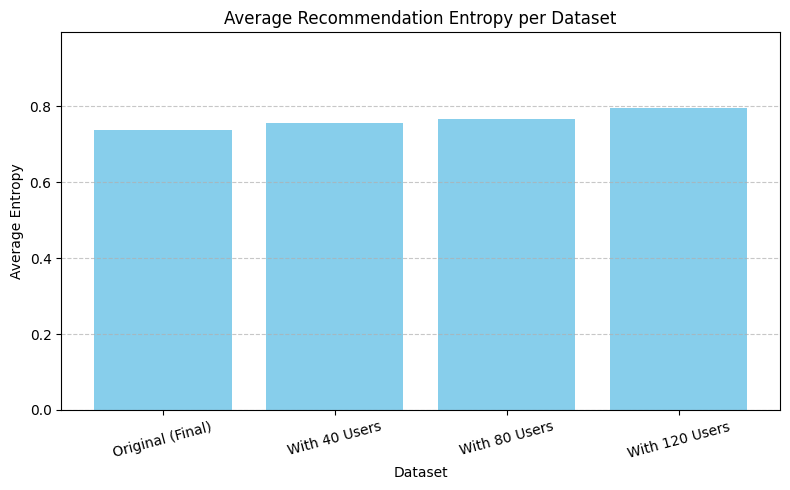

In [ ]:
from scipy.stats import entropy
import matplotlib.pyplot as plt

# ===== Calculate average entropy =====
avg_entropy = {
    'Original (Final)': entropy_0['recommendation_entropy'].mean(),
    'With 40 Users': entropy_40['recommendation_entropy'].mean(),
    'With 80 Users': entropy_80['recommendation_entropy'].mean(),
    'With 120 Users': entropy_120['recommendation_entropy'].mean()
}

# ===== Plot the results =====
plt.figure(figsize=(8, 5))
plt.bar(avg_entropy.keys(), avg_entropy.values(), color='skyblue')
plt.title('Average Recommendation Entropy per Dataset')
plt.ylabel('Average Entropy')
plt.xlabel('Dataset')
plt.ylim(0, max(avg_entropy.values()) + 0.2)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

🎯 Random User per Cluster:
   user_id  cluster   entropy
0      602        0  0.250955
1       46        1  0.348832
2      815        2  1.633884

🔍 Entropy for User 602.0 (Cluster 0.0):
 - Entropy with dataset Original: 0.245
 - Entropy with dataset +40 Users: 0.245
 - Entropy with dataset +80 Users: 0.245
 - Entropy with dataset +120 Users: 0.245


/var/folders/dt/6q8_7fhn65x7bhgb54cc6qbc0000gn/T/ipykernel_3318/4060837901.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_cluster.groupby("cluster")


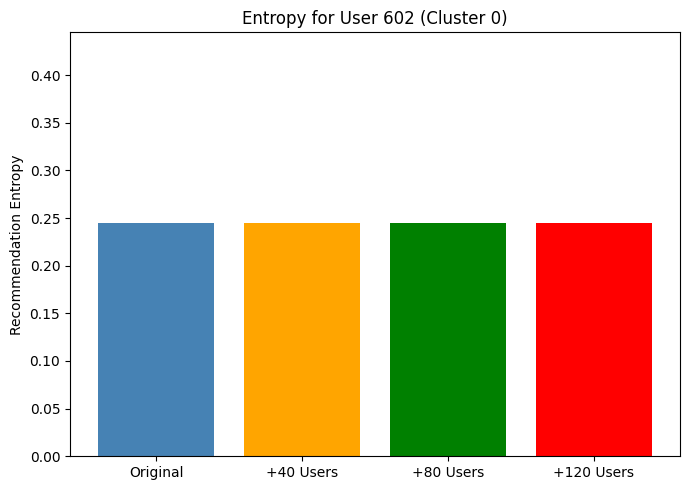


🔍 Entropy for User 46.0 (Cluster 1.0):
 - Entropy with dataset Original: 0.245
 - Entropy with dataset +40 Users: 0.000
 - Entropy with dataset +80 Users: 0.245
 - Entropy with dataset +120 Users: 0.245


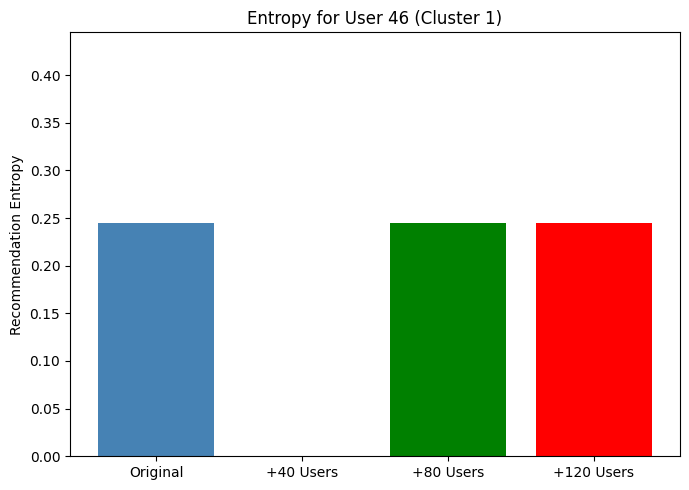


🔍 Entropy for User 815.0 (Cluster 2.0):
 - Entropy with dataset Original: 1.640
 - Entropy with dataset +40 Users: 1.679
 - Entropy with dataset +80 Users: 1.714
 - Entropy with dataset +120 Users: 1.714


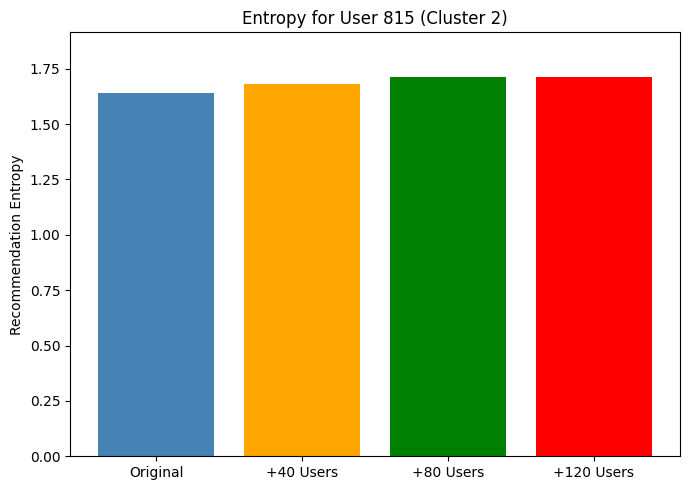

In [24]:
# Sample one random user per cluster
import random
# Set random seed for reproducibility
random.seed(42)
sampled_users = (
    df_cluster.groupby("cluster")
    .apply(lambda x: x.sample(1))
    .reset_index(drop=True)
)

print("🎯 Random User per Cluster:")
print(sampled_users)

# Entropy DataFrames
entropy_dfs = {
    "Original": entropy_0,
    "+40 Users": entropy_40,
    "+80 Users": entropy_80,
    "+120 Users": entropy_120
}

# Plot entropy per user
for idx, row in sampled_users.iterrows():
    user_id = row["user_id"]
    cluster_id = row["cluster"]

    # Get entropy values
    user_entropies = {}
    for label, df in entropy_dfs.items():
        match = df[df['user_id'] == user_id]['recommendation_entropy']
        user_entropies[label] = match.values[0] if not match.empty else None

    # ✅ Print values
    print(f"\n🔍 Entropy for User {user_id} (Cluster {cluster_id}):")
    for label, val in user_entropies.items():
        print(f" - Entropy with dataset {label}: {val:.3f}")

    # ✅ Plot with dynamic y-limits
    entropy_vals = list(user_entropies.values())
    y_max = max(entropy_vals) + 0.2

    plt.figure(figsize=(7, 5))  # Standard size
    plt.bar(user_entropies.keys(), entropy_vals, color=["steelblue", "orange", "green", "red"])
    plt.title(f"Entropy for User {int(user_id)} (Cluster {int(cluster_id)})")
    plt.ylabel("Recommendation Entropy")
    plt.ylim(0, y_max)
    plt.tight_layout()
    plt.show()


In [22]:
df_final = pd.read_csv('../preprocessing/df_final.csv')
df_final[df_final['user_id'] == 811]

,user_id,item_id,rating,decade
55155,811,301,5,1990.0
55687,811,292,3,1990.0
58934,811,304,5,1990.0
59576,811,294,4,1990.0
59952,811,748,3,1990.0
61330,811,690,5,1990.0
61404,811,258,5,1990.0
64502,811,323,5,1990.0
66374,811,892,4,1990.0
70540,811,289,2,1990.0


In [ ]:
# ==== Step 1: Identify the cluster for a specific user ====
target_user_id = 510
user_cluster = df_cluster.loc[df_cluster['user_id'] == target_user_id, 'cluster'].values[0]
print(f"User ID {target_user_id} belongs to cluster: {user_cluster}")

# ==== Step 2: Show top 15/10 recommendations for specific users in each cluster ====

# --- Cluster 0 Users ---
cluster_0_users = [941, 2]
for user_id in cluster_0_users:
    user_recs = top15_df_120_with_decade[top15_df_120_with_decade['user_id'] == user_id]
    print(f"\nTop 15 Recommendations for User {user_id} (Cluster 0):")
    print(user_recs)

# --- Cluster 1 Users ---
cluster_1_users = [943]
for user_id in cluster_1_users:
    user_recs = top15_df_120_with_decade[top15_df_120_with_decade['user_id'] == user_id]
    print(f"\nTop 15 Recommendations for User {user_id} (Cluster 1):")
    print(user_recs)

# --- Cluster 2 Users ---
cluster_2_users = [942, 5]
for user_id in cluster_2_users:
    user_recs = top15_df_120_with_decade[top15_df_120_with_decade['user_id'] == user_id]
    print(f"\nTop 10 Recommendations for User {user_id} (Cluster 2):")
    print(user_recs)

In [ ]:
# Extract item_id sets for user_id = 1 from each dataset
items_final = set(top15_df_0_with_decade[top15_df_0_with_decade['user_id'] == 943]['item_id'])
items_40 = set(top15_df_40_with_decade[top15_df_40_with_decade['user_id'] == 943]['item_id'])
items_80 = set(top15_df_80_with_decade[top15_df_80_with_decade['user_id'] ==943]['item_id'])
items_120 = set(top15_df_120_with_decade[top15_df_120_with_decade['user_id'] == 943]['item_id'])

# Find common item_ids across all datasets
common_items = items_final & items_40 & items_80 & items_120

print(f"Common item_ids(Movies) recommended for user 943 across all datasets: {common_items}")

Common item_ids(Movies) recommended for user 943 across all datasets: {33, 578, 357, 550, 742, 265, 746, 651, 684, 150, 735}


In [ ]:
# Helper function to print cluster results for a user/item
def print_cluster_info(user_id, item_id, cluster_label):
    cluster = df_cluster[df_cluster['user_id'] == user_id]['cluster'].values[0]
    print(f"---- Cluster {cluster_label} ----")
    print(f"User_id {user_id} belongs to cluster: {cluster}\n")
    
    datasets = {
        "0": top15_df_0_with_decade,
        "40": top15_df_40_with_decade,
        "80": top15_df_80_with_decade,
        "120": top15_df_120_with_decade
    }
    for label, df in datasets.items():
        result = df[(df['user_id'] == user_id) & (df['item_id'] == item_id)]
        print(f"-------{label}:--------")
        if not result.empty:
            print(result.to_string(index=False))
        else:
            print(f"(user {user_id}, item {item_id}) not found in top15 for dataset {label}")
    print("\n")


# Call the function for each cluster
print_cluster_info(user_id=111, item_id=50, cluster_label=0)
print_cluster_info(user_id=453, item_id=651, cluster_label=1)
print_cluster_info(user_id=942, item_id=181, cluster_label=2)


---- Cluster 0 ----
User_id 111 belongs to cluster: 0

-------0:--------
(user 111, item 50) not found in top15 for dataset 0
-------40:--------
(user 111, item 50) not found in top15 for dataset 40
-------80:--------
(user 111, item 50) not found in top15 for dataset 80
-------120:--------
(user 111, item 50) not found in top15 for dataset 120


---- Cluster 1 ----
User_id 453 belongs to cluster: 1

-------0:--------
(user 453, item 651) not found in top15 for dataset 0
-------40:--------
(user 453, item 651) not found in top15 for dataset 40
-------80:--------
(user 453, item 651) not found in top15 for dataset 80
-------120:--------
(user 453, item 651) not found in top15 for dataset 120


---- Cluster 2 ----
User_id 942 belongs to cluster: 2

-------0:--------
 user_id  item_id  predicted_rating  decade
     942      181          3.019217  1990.0
-------40:--------
 user_id  item_id  predicted_rating  decade
     942      181           3.66586  1990.0
-------80:--------
 user_id  i

In [118]:
print_cluster_info(user_id=1, item_id=423, cluster_label=1)

---- Cluster 1 ----
User_id 1 belongs to cluster: 0

-------0:--------
 user_id  item_id  predicted_rating  decade
       1      423          3.480956  1980.0
-------40:--------
 user_id  item_id  predicted_rating  decade
       1      423          2.751479  1980.0
-------80:--------
 user_id  item_id  predicted_rating  decade
       1      423          2.434168  1980.0
-------120:--------
 user_id  item_id  predicted_rating  decade
       1      423          2.453087  1980.0




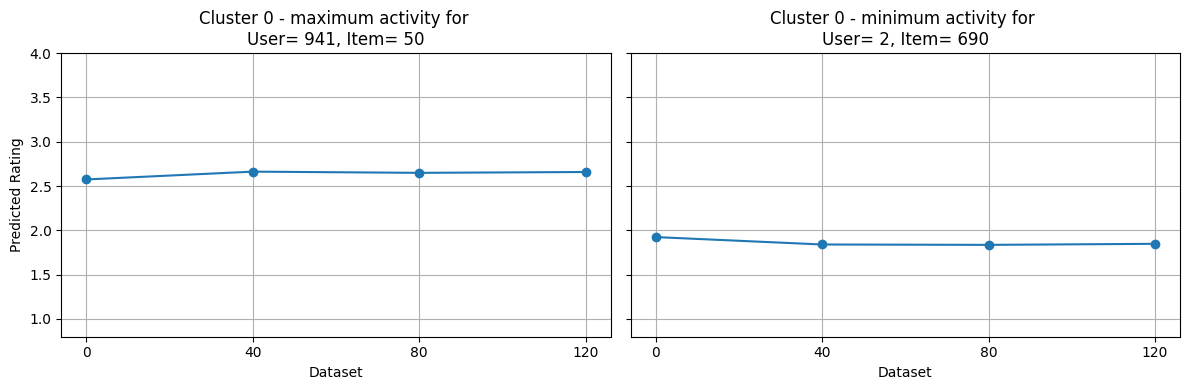

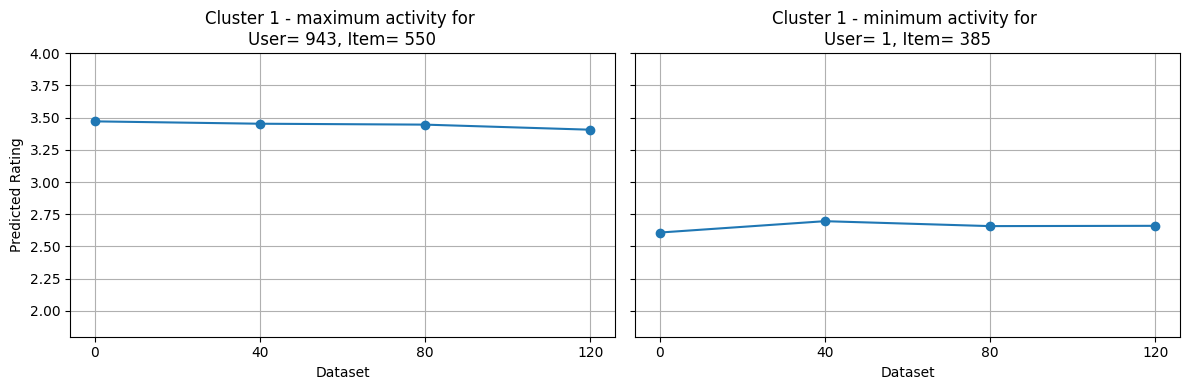

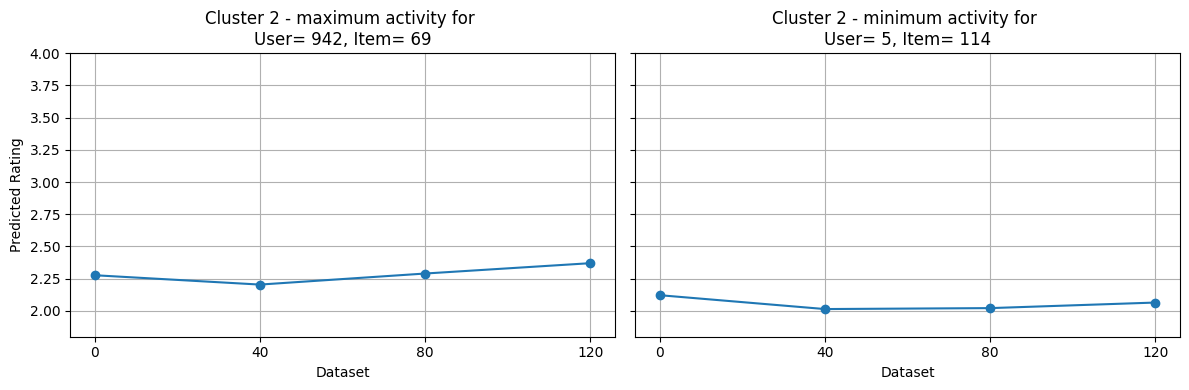

In [ ]:
# Define dataset labels
x_labels = ["0", "40", "80", "120"]

# Helper function to extract predicted rating or return NaN
def get_rating(df, user_id, item_id):
    result = df[(df['user_id'] == user_id) & (df['item_id'] == item_id)]
    return result['predicted_rating'].values[0] if not result.empty else float('nan')

# Extended plotting function to draw side-by-side plots
def plot_dual_cluster_ratings(cluster_label, max_pair, min_pair, y_range):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

    # Max plot
    max_ratings = [
        get_rating(top10_df_final_with_decade, *max_pair),
        get_rating(top10_df_40_with_decade, *max_pair),
        get_rating(top10_df_80_with_decade, *max_pair),
        get_rating(top10_df_120_with_decade, *max_pair)
    ]
    axs[0].plot(x_labels, max_ratings, marker='o', linestyle='-')
    axs[0].set_title(f"Cluster {cluster_label} - maximum activity for \nUser= {max_pair[0]}, Item= {max_pair[1]}")
    axs[0].set_xlabel("Dataset")
    axs[0].set_ylabel("Predicted Rating")
    axs[0].set_ylim(*y_range)
    axs[0].grid(True)

    # Min plot
    min_ratings = [
        get_rating(top10_df_final_with_decade, *min_pair),
        get_rating(top10_df_40_with_decade, *min_pair),
        get_rating(top10_df_80_with_decade, *min_pair),
        get_rating(top10_df_120_with_decade, *min_pair)
    ]
    axs[1].plot(x_labels, min_ratings, marker='o', linestyle='-')
    axs[1].set_title(f"Cluster {cluster_label} - minimum activity for \nUser= {min_pair[0]}, Item= {min_pair[1]}")
    axs[1].set_xlabel("Dataset")
    axs[1].set_ylim(*y_range)
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

# Cluster 0
plot_dual_cluster_ratings(cluster_label=0, max_pair=(941, 50), min_pair=(2, 690), y_range=(.8, 4))

# Cluster 1
plot_dual_cluster_ratings(cluster_label=1, max_pair=(943, 550), min_pair=(1, 385), y_range=(1.8, 4.0))

# Cluster 2
plot_dual_cluster_ratings(cluster_label=2, max_pair=(942, 69), min_pair=(5, 114), y_range=(1.8, 4))


In [ ]:
df_final[(df_final['user_id'] == 123) & (df_final['item_id'] == 474)]

In [108]:
df_cluster_2_top[(df_cluster_2_top['user_id'] == 123)]

,user_id,num_ratings
39,123,54


In [109]:
# Check if user_id 1 has rated item_id 276
rating_check = df_final[(df_final['user_id'] == 1) & (df_final['item_id'] == 515)]

# Check if the DataFrame is not empty
if not rating_check.empty:
    print(f"User 1 has rated item 515. Rating: {rating_check['rating'].values[0]}")
else:
    print("User 1 has not rated item 515.")

User 1 has not rated item 515.


measure/eval

In [123]:
import pandas as pd

# Define destination folder
save_path = "/Users/saramoshtaghi/Documents/Research/Recommender Systems/phd-svd-recsys/result"

# Dictionary of in-memory DataFrames
files = {
    "0": top10_df_final_with_decade,
    "40": top10_df_40_with_decade,
    "80": top10_df_80_with_decade,
    "120": top10_df_120_with_decade
}

# Process and save
decade_counts = {}
for key, df in files.items():
    decade_count = df.groupby(['user_id', 'decade']).size().unstack(fill_value=0)
    decade_counts[key] = decade_count
    decade_count.to_csv(f"{save_path}/decade_counts_{key}.csv")

print("✅ Decade counts saved to /result directory.")


✅ Decade counts saved to /result directory.


In [2]:
print(40)

40


In [41]:
# Load the CSVs
df_0 = pd.read_csv("../result/decade_counts_0.csv")
df_40 = pd.read_csv("../result/decade_counts_40.csv")
df_80 = pd.read_csv("../result/decade_counts_80.csv")
df_120 = pd.read_csv("../result/decade_counts_120.csv")

# Add suffixes to columns to distinguish datasets
df_0 = df_0.set_index('user_id').stack().reset_index()
df_0.columns = ['user_id', 'decade', 'count_0']

df_40 = df_40.set_index('user_id').stack().reset_index()
df_40.columns = ['user_id', 'decade', 'count_40']

df_80 = df_80.set_index('user_id').stack().reset_index()
df_80.columns = ['user_id', 'decade', 'count_80']

df_120 = df_120.set_index('user_id').stack().reset_index()
df_120.columns = ['user_id', 'decade', 'count_120']

# Merge all on user_id and decade
merged_df = df_0.merge(df_40, on=['user_id', 'decade'], how='outer') \
                .merge(df_80, on=['user_id', 'decade'], how='outer') \
                .merge(df_120, on=['user_id', 'decade'], how='outer')

# Fill missing values with 0
merged_df.fillna(0, inplace=True)

# Sort for readability
merged_df.sort_values(['user_id', 'decade'], inplace=True)

# Save if needed
merged_df.to_csv("../result/merged_decade_counts.csv", index=False)

# Show sample
#print(merged_df.head(10))

merged_df[merged_df['user_id'] == 1]


,user_id,decade,count_0,count_40,count_80,count_120
0,1,1920.0,0.0,0.0,0.0,0
1,1,1930.0,0.0,0.0,0.0,0
2,1,1940.0,0.0,0.0,0.0,0
3,1,1950.0,0.0,0.0,0.0,0
4,1,1960.0,0.0,1.0,1.0,1
5,1,1970.0,1.0,0.0,0.0,0
6,1,1980.0,2.0,1.0,0.0,0
7,1,1990.0,7.0,8.0,9.0,9


In [15]:
#cluster 0
merged_df[merged_df['user_id'] == 39]

,user_id,decade,count_0,count_40,count_80,count_120
304,39,1920.0,0.0,0.0,0.0,0
305,39,1930.0,0.0,0.0,0.0,0
306,39,1940.0,0.0,0.0,0.0,0
307,39,1950.0,0.0,0.0,0.0,0
308,39,1960.0,0.0,0.0,0.0,0
309,39,1970.0,0.0,0.0,0.0,0
310,39,1980.0,0.0,0.0,0.0,0
311,39,1990.0,10.0,10.0,10.0,10


In [ ]:
#cluster 1
merged_df[merged_df['user_id'] == 1]

,user_id,decade,count_0,count_40,count_80,count_120
0,1,1920.0,0.0,0.0,0.0,0
1,1,1930.0,0.0,0.0,0.0,0
2,1,1940.0,0.0,0.0,0.0,0
3,1,1950.0,0.0,0.0,0.0,0
4,1,1960.0,0.0,1.0,1.0,1
5,1,1970.0,1.0,0.0,0.0,0
6,1,1980.0,2.0,1.0,0.0,0
7,1,1990.0,7.0,8.0,9.0,9


In [16]:
#cluster 2
merged_df[merged_df['user_id'] == 44]

,user_id,decade,count_0,count_40,count_80,count_120
344,44,1920.0,0.0,0.0,0.0,0
345,44,1930.0,1.0,1.0,1.0,1
346,44,1940.0,0.0,0.0,0.0,0
347,44,1950.0,0.0,0.0,0.0,0
348,44,1960.0,0.0,0.0,0.0,0
349,44,1970.0,2.0,1.0,2.0,2
350,44,1980.0,2.0,1.0,2.0,2
351,44,1990.0,5.0,7.0,5.0,5


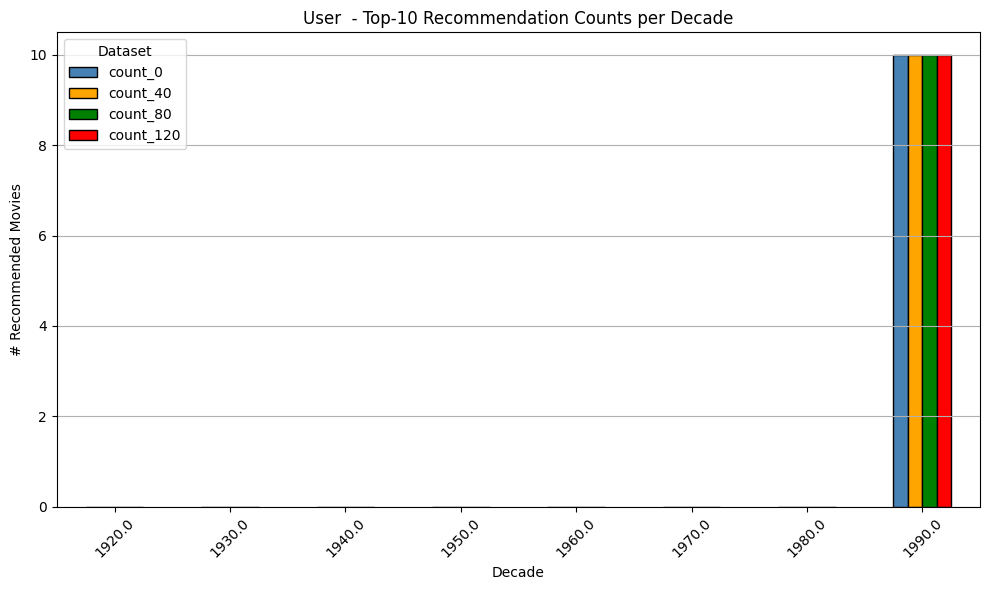

In [62]:
import pandas as pd
import matplotlib.pyplot as plt


user_id = 289
user_df = merged_df[merged_df['user_id'] == user_id].set_index("decade")

# Plot
user_df[['count_0', 'count_40', 'count_80', 'count_120']].plot(
    kind='bar',
    figsize=(10, 6),
    color=["steelblue", "orange", "green", "red"],
    edgecolor='black'
)

plt.title("User  - Top-10 Recommendation Counts per Decade")
plt.xlabel("Decade")
plt.ylabel("# Recommended Movies")
plt.legend(title="Dataset")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("user_1_decade_change.png", dpi=300)
plt.show()


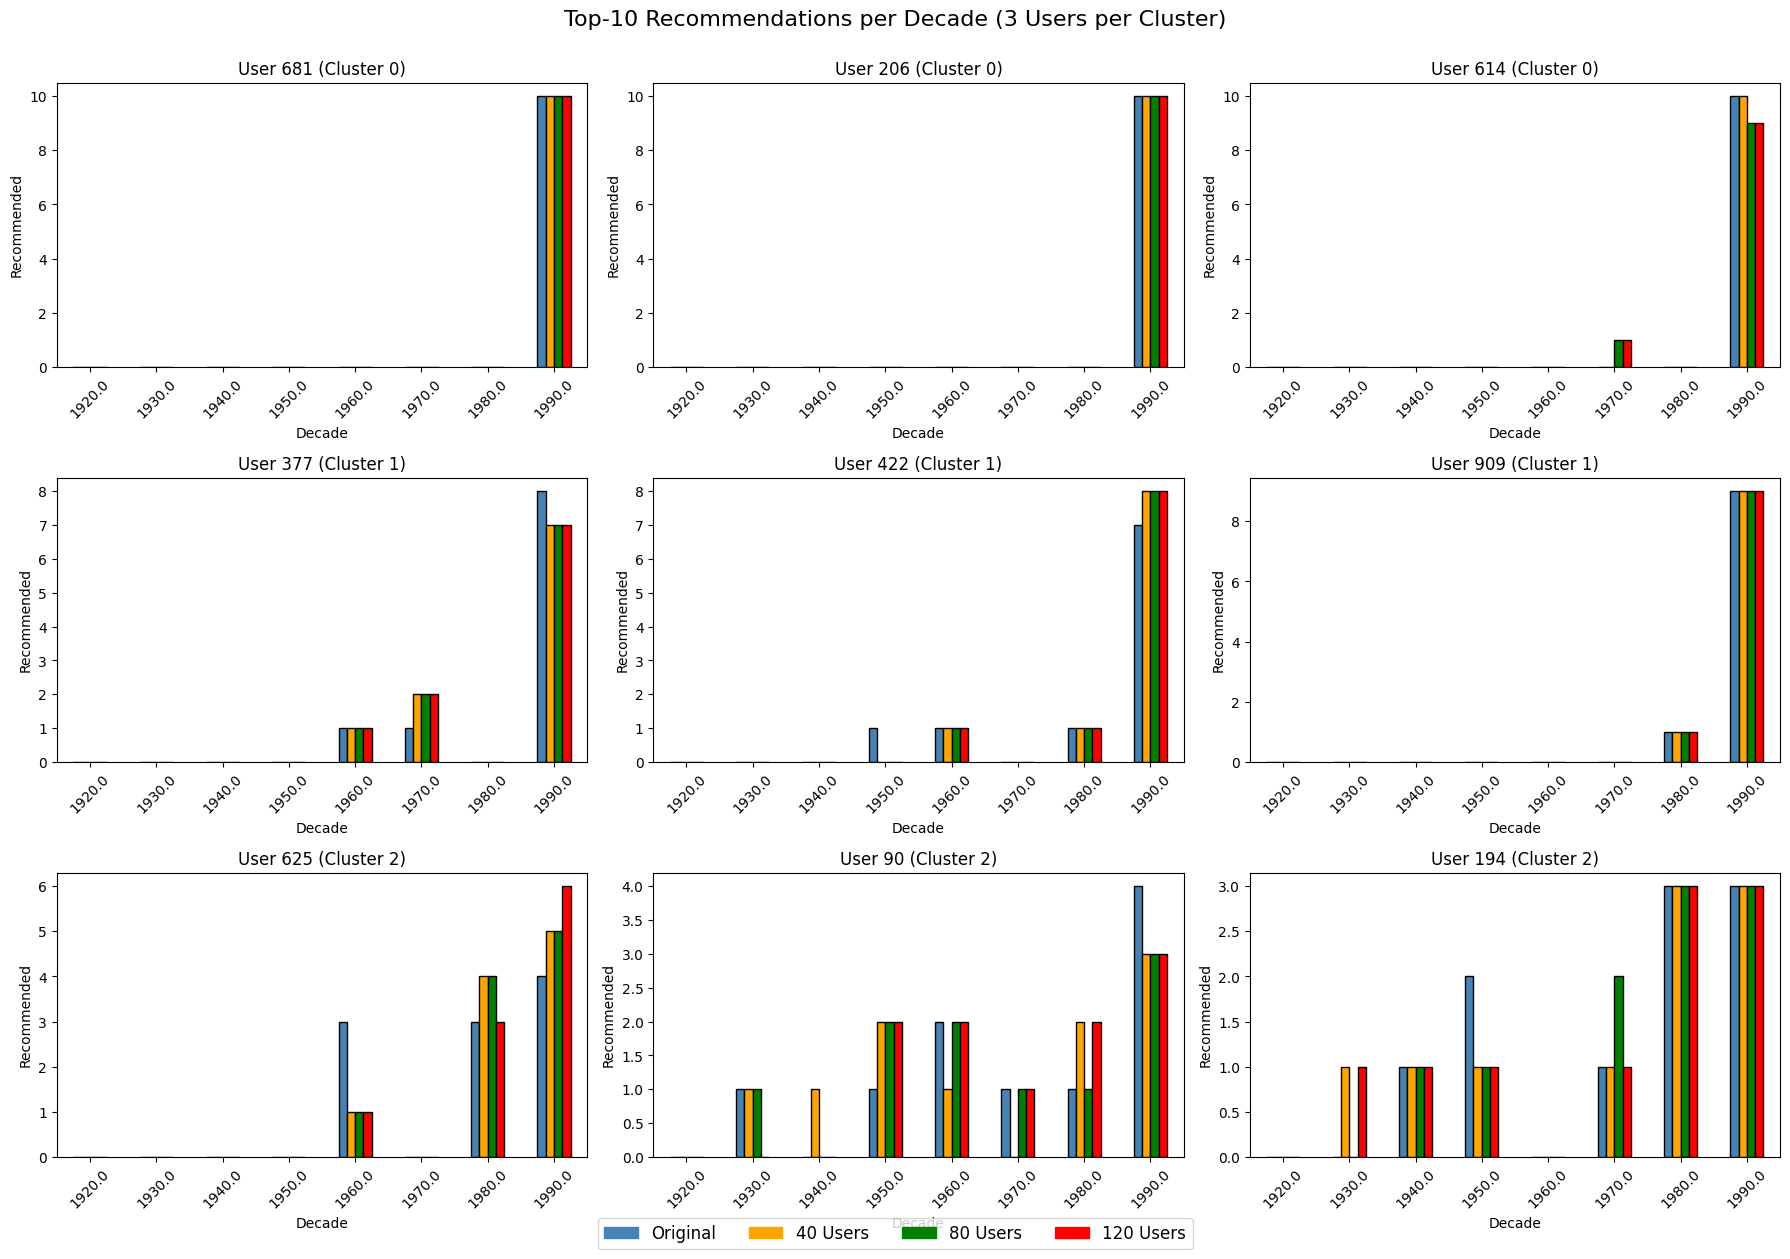

✅ Plot grid saved to: /Users/saramoshtaghi/Documents/Research/Recommender Systems/phd-svd-recsys/result/top10_recommendation_comparison_grid.png


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import os

# File paths
base_path = "/Users/saramoshtaghi/Documents/Research/Recommender Systems/phd-svd-recsys"
result_path = f"{base_path}/result"
preprocessing_path = f"{base_path}/preprocessing"
merged_path = os.path.join(result_path, "merged_decade_counts.csv")

# Load merged decade counts
merged_df = pd.read_csv(merged_path)

# Load cluster user files
cluster_files = {
    0: os.path.join(preprocessing_path, "cluster_0_users.csv"),
    1: os.path.join(preprocessing_path, "cluster_1_users.csv"),
    2: os.path.join(preprocessing_path, "cluster_2_users.csv"),
}

# Randomly select 3 users from each cluster
selected_users = []
user_cluster_map = {}
for cluster_id, path in cluster_files.items():
    cluster_users_df = pd.read_csv(path)
    sampled_users = cluster_users_df['user_id'].sample(3, random_state=13).tolist()
    selected_users.extend(sampled_users)
    for uid in sampled_users:
        user_cluster_map[uid] = cluster_id

# Setup 3x3 subplot
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

# Plot per user
for idx, user_id in enumerate(selected_users):
    user_df = merged_df[merged_df['user_id'] == user_id].set_index("decade")

    user_df[['count_0', 'count_40', 'count_80', 'count_120']].plot(
        kind='bar',
        ax=axes[idx],
        color=["steelblue", "orange", "green", "red"],
        edgecolor='black'
    )

    cluster_id = user_cluster_map[user_id]
    axes[idx].set_title(f"User {user_id} (Cluster {cluster_id})")
    axes[idx].set_xlabel("Decade")
    axes[idx].set_ylabel("Recommended")
    axes[idx].legend().set_visible(False)
    axes[idx].tick_params(axis='x', rotation=45)

# Create a custom legend
import matplotlib.patches as mpatches

legend_labels = {
    "count_0": "Original",
    "count_40": "40 Users",
    "count_80": "80 Users",
    "count_120": "120 Users"
}
legend_colors = ["steelblue", "orange", "green", "red"]

patches = [
    mpatches.Patch(color=color, label=legend_labels[label])
    for color, label in zip(legend_colors, legend_labels)
]

# Add a shared legend below the plots
fig.legend(
    handles=patches,
    loc='lower center',
    ncol=4,
    bbox_to_anchor=(0.5, -0.01),
    fontsize=12
)


# Final touches
plt.tight_layout()
plt.suptitle("Top-10 Recommendations per Decade (3 Users per Cluster)", fontsize=16, y=1.03)
plt.show()

# Save plot
save_path = os.path.join(result_path, "top10_recommendation_comparison_grid.png")
plt.savefig(save_path, dpi=300)
plt.close()

print(f"✅ Plot grid saved to: {save_path}")



In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import random

# File paths
base_path = "/Users/saramoshtaghi/Documents/Research/Recommender Systems/phd-svd-recsys"
result_path = f"{base_path}/result"
preprocessing_path = f"{base_path}/preprocessing"
merged_path = os.path.join(result_path, "merged_decade_counts.csv")

# Load merged decade counts
merged_df = pd.read_csv(merged_path)

# Load cluster user files
cluster_files = {
    0: os.path.join(preprocessing_path, "cluster_0_users.csv"),
    1: os.path.join(preprocessing_path, "cluster_1_users.csv"),
    2: os.path.join(preprocessing_path, "cluster_2_users.csv"),
}

# Randomly sample 3 users per cluster
random.seed(162)
selected_users_by_cluster = {}
for cluster_id, path in cluster_files.items():
    user_ids = pd.read_csv(path)['user_id'].tolist()
    selected_users_by_cluster[cluster_id] = random.sample(user_ids, 3)


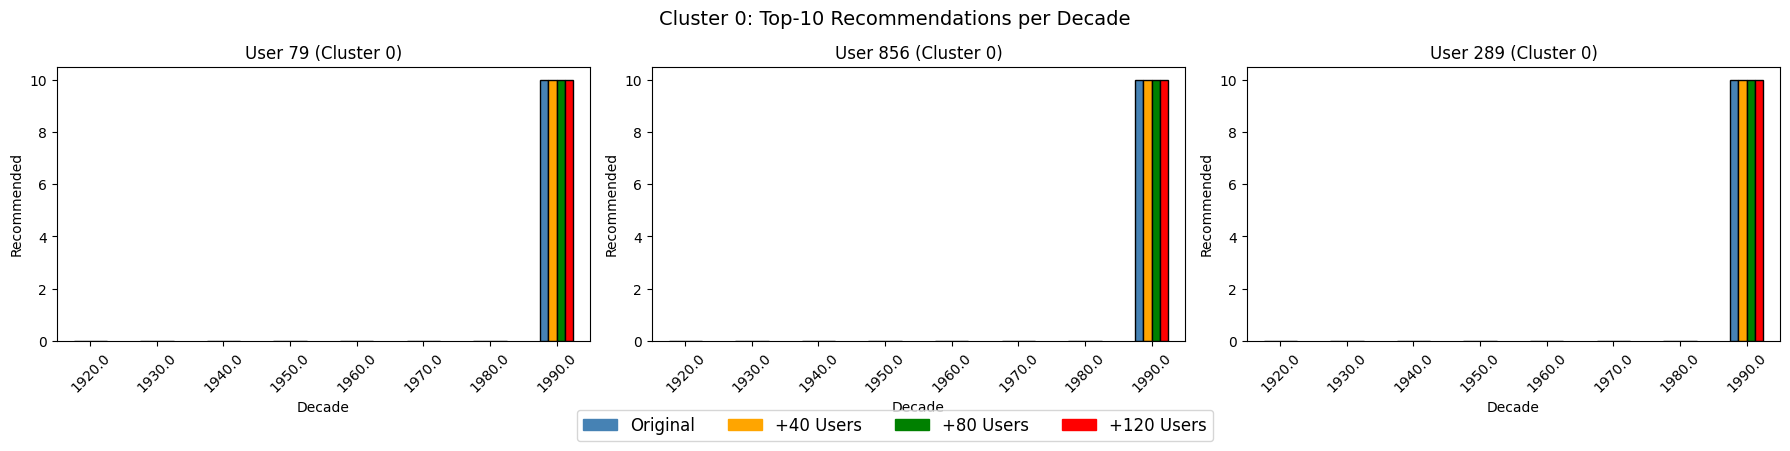

In [58]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
for idx, user_id in enumerate(selected_users_by_cluster[0]):
    user_df = merged_df[merged_df['user_id'] == user_id].set_index("decade")
    user_df[['count_0', 'count_40', 'count_80', 'count_120']].plot(
        kind='bar',
        ax=axes[idx],
        color=["steelblue", "orange", "green", "red"],
        edgecolor='black'
    )
    axes[idx].set_title(f"User {user_id} (Cluster 0)")
    axes[idx].set_xlabel("Decade")
    axes[idx].set_ylabel("Recommended")
    axes[idx].legend().set_visible(False)
    axes[idx].tick_params(axis='x', rotation=45)

# Shared legend
import matplotlib.patches as mpatches
legend_labels = ["Original", "+40 Users", "+80 Users", "+120 Users"]
legend_colors = ["steelblue", "orange", "green", "red"]
patches = [mpatches.Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]
fig.legend(handles=patches, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.05), fontsize=12)

plt.tight_layout()
plt.suptitle("Cluster 0: Top-10 Recommendations per Decade", fontsize=14, y=1.05)
plt.show()


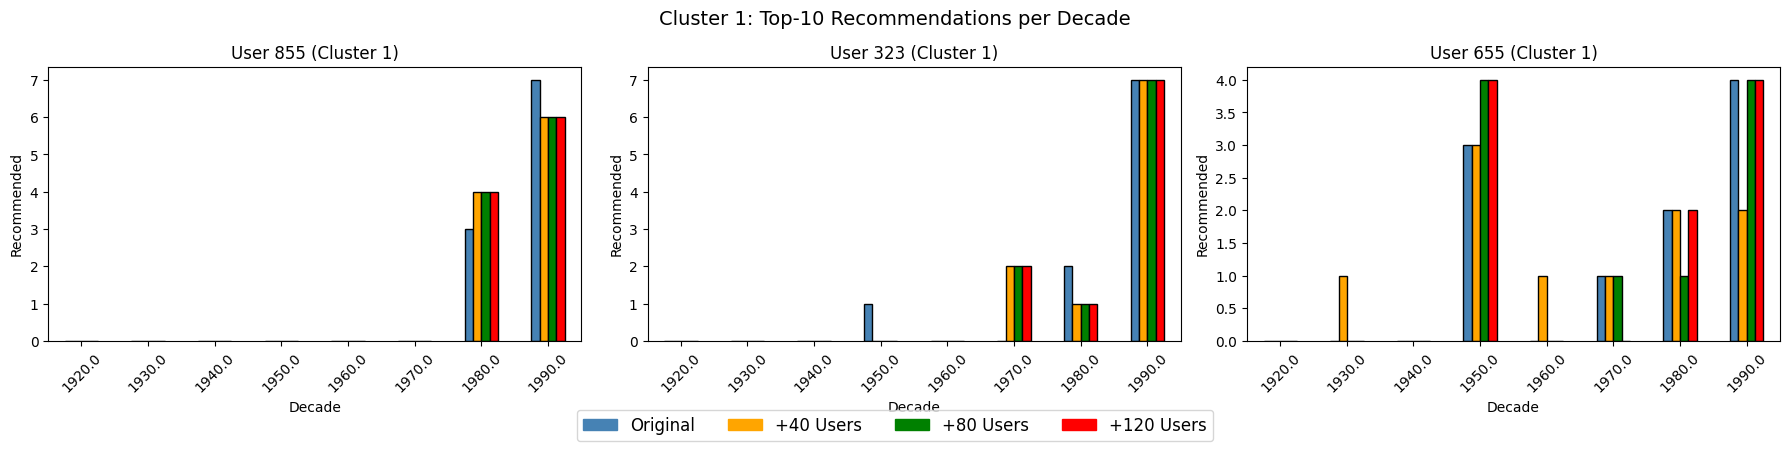

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
for idx, user_id in enumerate(selected_users_by_cluster[1]):
    user_df = merged_df[merged_df['user_id'] == user_id].set_index("decade")
    user_df[['count_0', 'count_40', 'count_80', 'count_120']].plot(
        kind='bar',
        ax=axes[idx],
        color=["steelblue", "orange", "green", "red"],
        edgecolor='black'
    )
    axes[idx].set_title(f"User {user_id} (Cluster 1)")
    axes[idx].set_xlabel("Decade")
    axes[idx].set_ylabel("Recommended")
    axes[idx].legend().set_visible(False)
    axes[idx].tick_params(axis='x', rotation=45)

patches = [mpatches.Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]
fig.legend(handles=patches, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.05), fontsize=12)

plt.tight_layout()
plt.suptitle("Cluster 1: Top-10 Recommendations per Decade", fontsize=14, y=1.05)
plt.show()


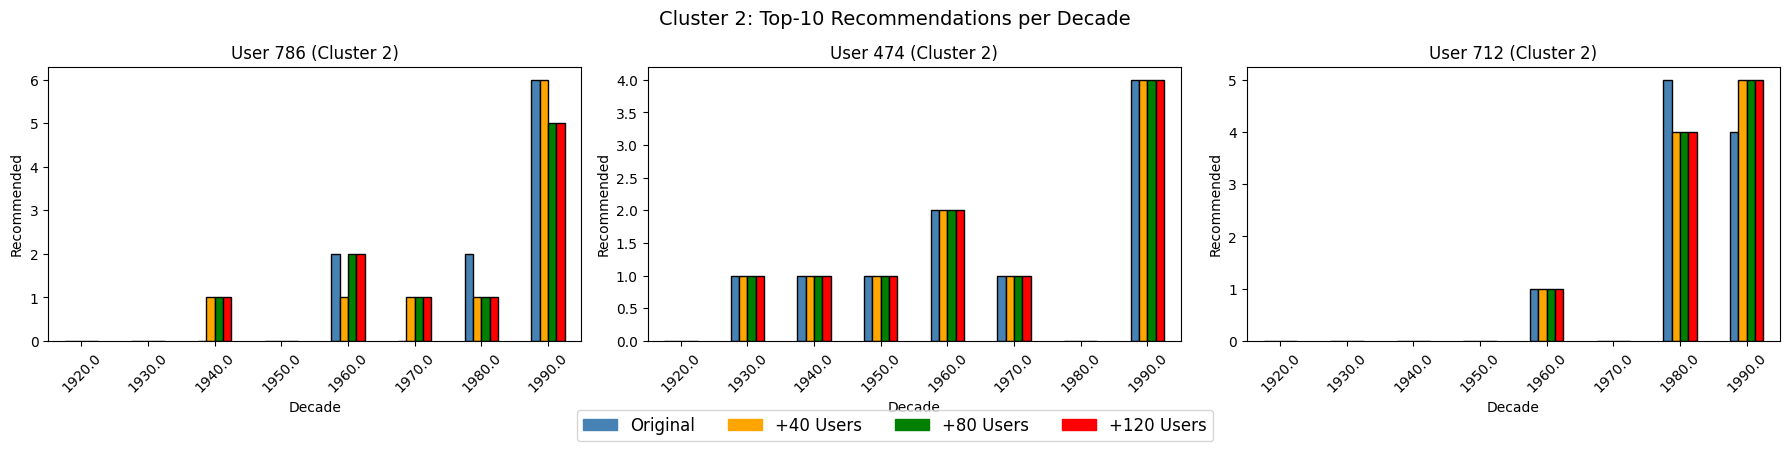

In [60]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
for idx, user_id in enumerate(selected_users_by_cluster[2]):
    user_df = merged_df[merged_df['user_id'] == user_id].set_index("decade")
    user_df[['count_0', 'count_40', 'count_80', 'count_120']].plot(
        kind='bar',
        ax=axes[idx],
        color=["steelblue", "orange", "green", "red"],
        edgecolor='black'
    )
    axes[idx].set_title(f"User {user_id} (Cluster 2)")
    axes[idx].set_xlabel("Decade")
    axes[idx].set_ylabel("Recommended")
    axes[idx].legend().set_visible(False)
    axes[idx].tick_params(axis='x', rotation=45)

patches = [mpatches.Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]
fig.legend(handles=patches, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.05), fontsize=12)

plt.tight_layout()
plt.suptitle("Cluster 2: Top-10 Recommendations per Decade", fontsize=14, y=1.05)
plt.show()


In [124]:
# Define path to saved decade count files
base_path = "/Users/saramoshtaghi/Documents/Research/Recommender Systems/phd-svd-recsys/result"

# Load decade counts
decade_counts = {
    "0": pd.read_csv(f"{base_path}/decade_counts_0.csv", index_col='user_id'),
    "40": pd.read_csv(f"{base_path}/decade_counts_40.csv", index_col='user_id'),
    "80": pd.read_csv(f"{base_path}/decade_counts_80.csv", index_col='user_id'),
    "120": pd.read_csv(f"{base_path}/decade_counts_120.csv", index_col='user_id'),
}

# Dictionary to store percent change DataFrames
percent_changes = {}

# Small epsilon to avoid division by zero
epsilon = 1e-6

# Compute percent change: (biased - unbiased) / (unbiased + epsilon) * 100
for bias in ['40', '80', '120']:
    unbiased = decade_counts['0']
    biased = decade_counts[bias]
    
    # Align rows and columns
    unbiased, biased = unbiased.align(biased, fill_value=0)
    
    # Percent change formula
    percent_change = ((biased - unbiased) / (unbiased + epsilon)) * 100
    percent_changes[bias] = percent_change
    
    # Save to CSV
    percent_change.to_csv(f"{base_path}/percent_change_{bias}.csv")

print("✅ Percent change per decade per user saved.")

✅ Percent change per decade per user saved.


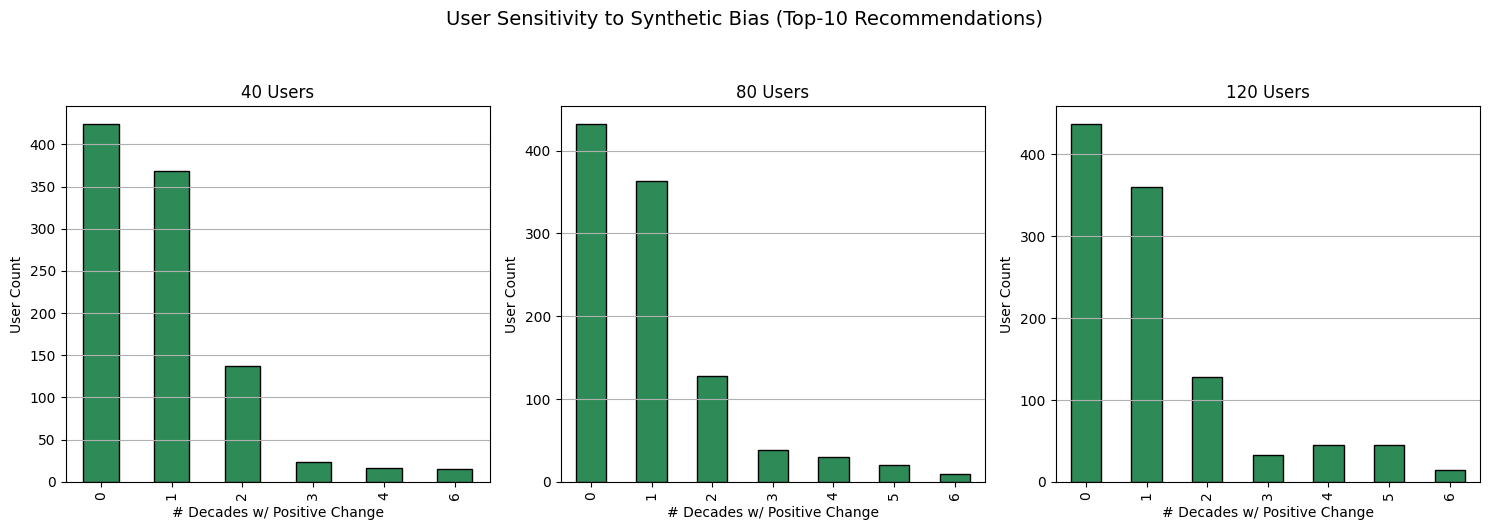

✅ Histogram saved to: /Users/saramoshtaghi/Documents/Research/Recommender Systems/phd-svd-recsys/result/positive_decade_change_histograms.png


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Base path
base_path = "../result"

# Load percent change CSVs
percent_changes = {
    "40 Users": pd.read_csv(f"{base_path}/percent_change_40.csv", index_col="user_id"),
    "80 Users": pd.read_csv(f"{base_path}/percent_change_80.csv", index_col="user_id"),
    "120 Users": pd.read_csv(f"{base_path}/percent_change_120.csv", index_col="user_id"),
}

# Count number of decades with positive change per user
positive_counts = {
    label: (df > 0).sum(axis=1)
    for label, df in percent_changes.items()
}

# Create and save the plot
plt.figure(figsize=(15, 5))
for i, (label, counts) in enumerate(positive_counts.items(), start=1):
    plt.subplot(1, 3, i)
    counts.value_counts().sort_index().plot(kind='bar', color='seagreen', edgecolor='black')
    plt.title(f"{label}")
    plt.xlabel("# Decades w/ Positive Change")
    plt.ylabel("User Count")
    plt.grid(axis='y')

plt.suptitle("User Sensitivity to Synthetic Bias (Top-10 Recommendations)", y=1.05, fontsize=14)
plt.tight_layout()
output_path = f"{base_path}/positive_decade_change_histograms.png"
plt.savefig(output_path, dpi=300)
plt.show()

print(f"✅ Histogram saved to: {output_path}")


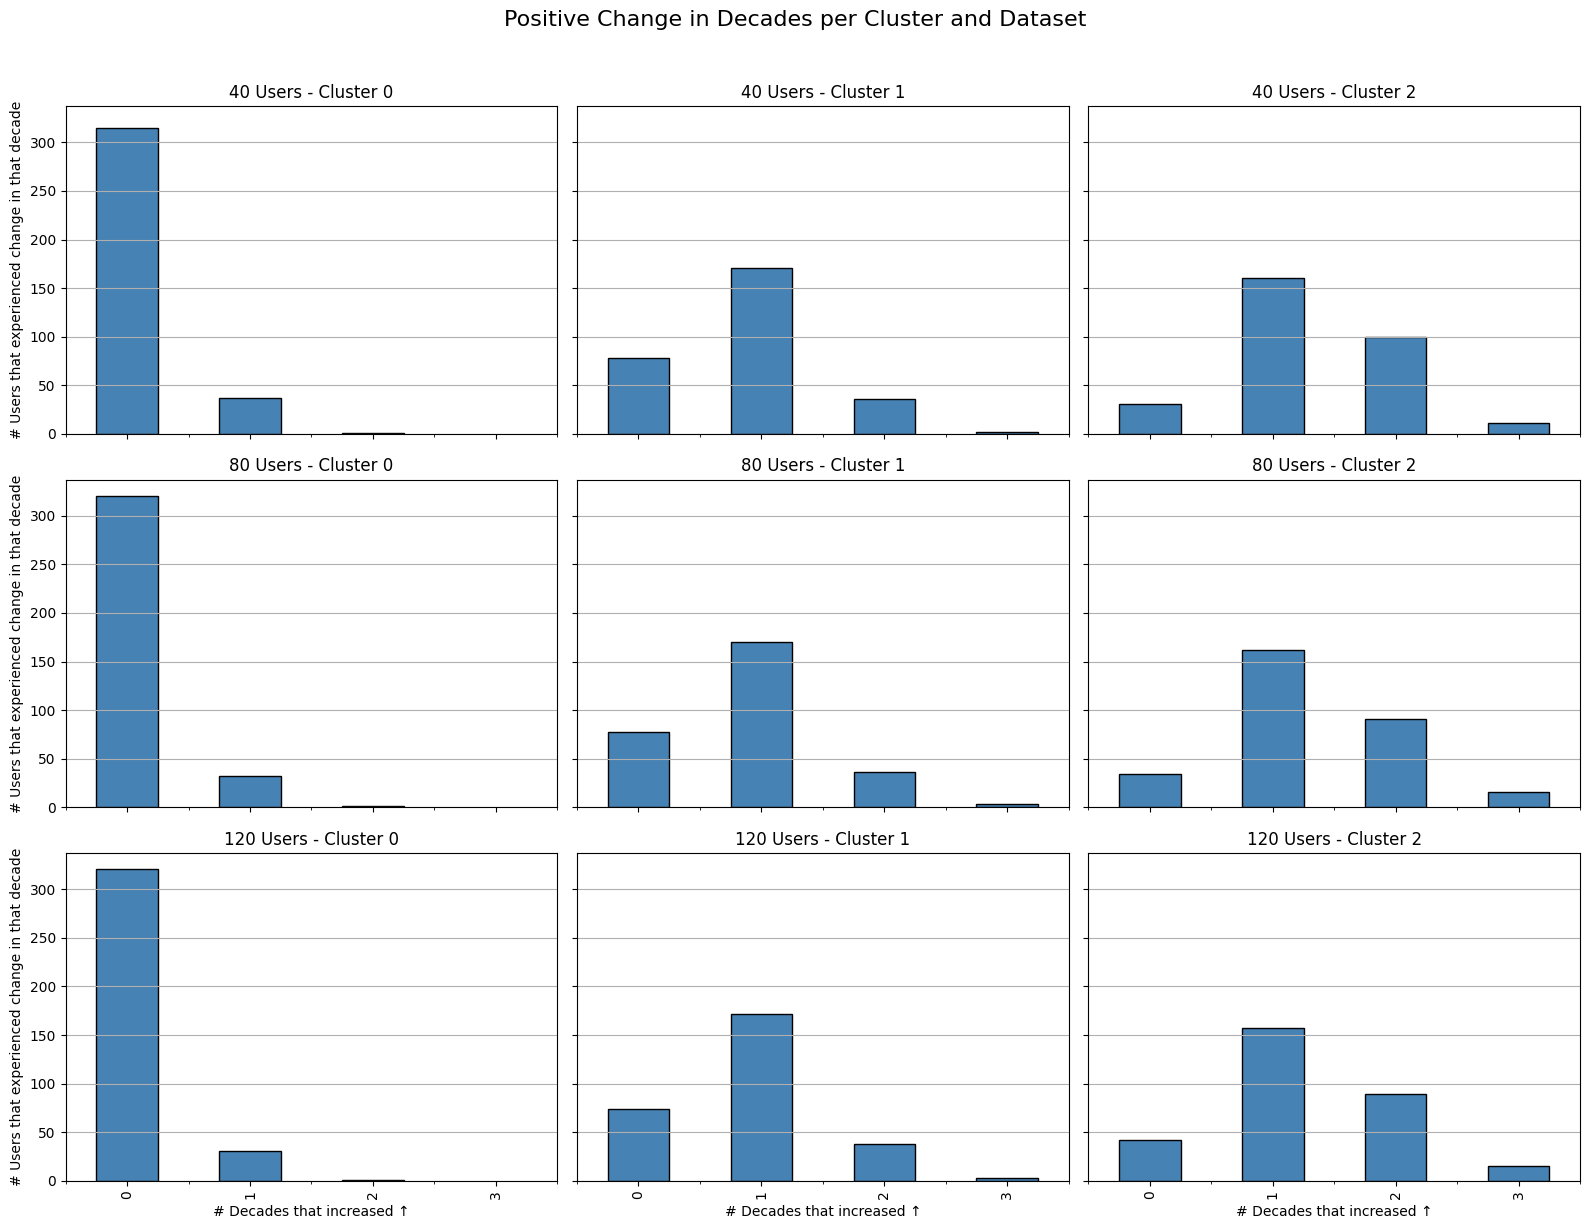

✅ Plot saved to: ../result/cluster_histograms.png


In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Paths
base_path = "../result"
user_entropy_path = "../preprocessing/user_entropy.csv"
save_path = f"{base_path}/cluster_histograms.png"

# Load user-cluster info
user_entropy = pd.read_csv(user_entropy_path)

# Load percent change tables
percent_files = {
    "40 Users": pd.read_csv(f"{base_path}/percent_change_40.csv", index_col="user_id"),
    "80 Users": pd.read_csv(f"{base_path}/percent_change_80.csv", index_col="user_id"),
    "120 Users": pd.read_csv(f"{base_path}/percent_change_120.csv", index_col="user_id"),
}

# Setup plot
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12), sharex=True, sharey=True)
clusters = [0, 1, 2]

for row_idx, (bias_label, df) in enumerate(percent_files.items()):
    for col_idx, cluster_id in enumerate(clusters):
        # Filter users in this cluster
        cluster_users = user_entropy[user_entropy['cluster'] == cluster_id]['user_id']
        cluster_df = df.loc[df.index.intersection(cluster_users)]

        # Count positive changes per user
        pos_counts = (cluster_df > 0).sum(axis=1)
        count_series = pos_counts.value_counts().sort_index()

        # Plot
        ax = axes[row_idx, col_idx]
        count_series.plot(kind='bar', ax=ax, color='steelblue', edgecolor='black')
        ax.set_title(f"{bias_label} - Cluster {cluster_id}")
        ax.set_xlabel("# Decades that increased ↑")
        ax.set_ylabel("# Users that experienced change in that decade")
        ax.grid(axis='y')

plt.suptitle("Positive Change in Decades per Cluster and Dataset", fontsize=16, y=1.02)
plt.tight_layout()
plt.savefig(save_path, dpi=300)
plt.show()

print(f"✅ Plot saved to: {save_path}")


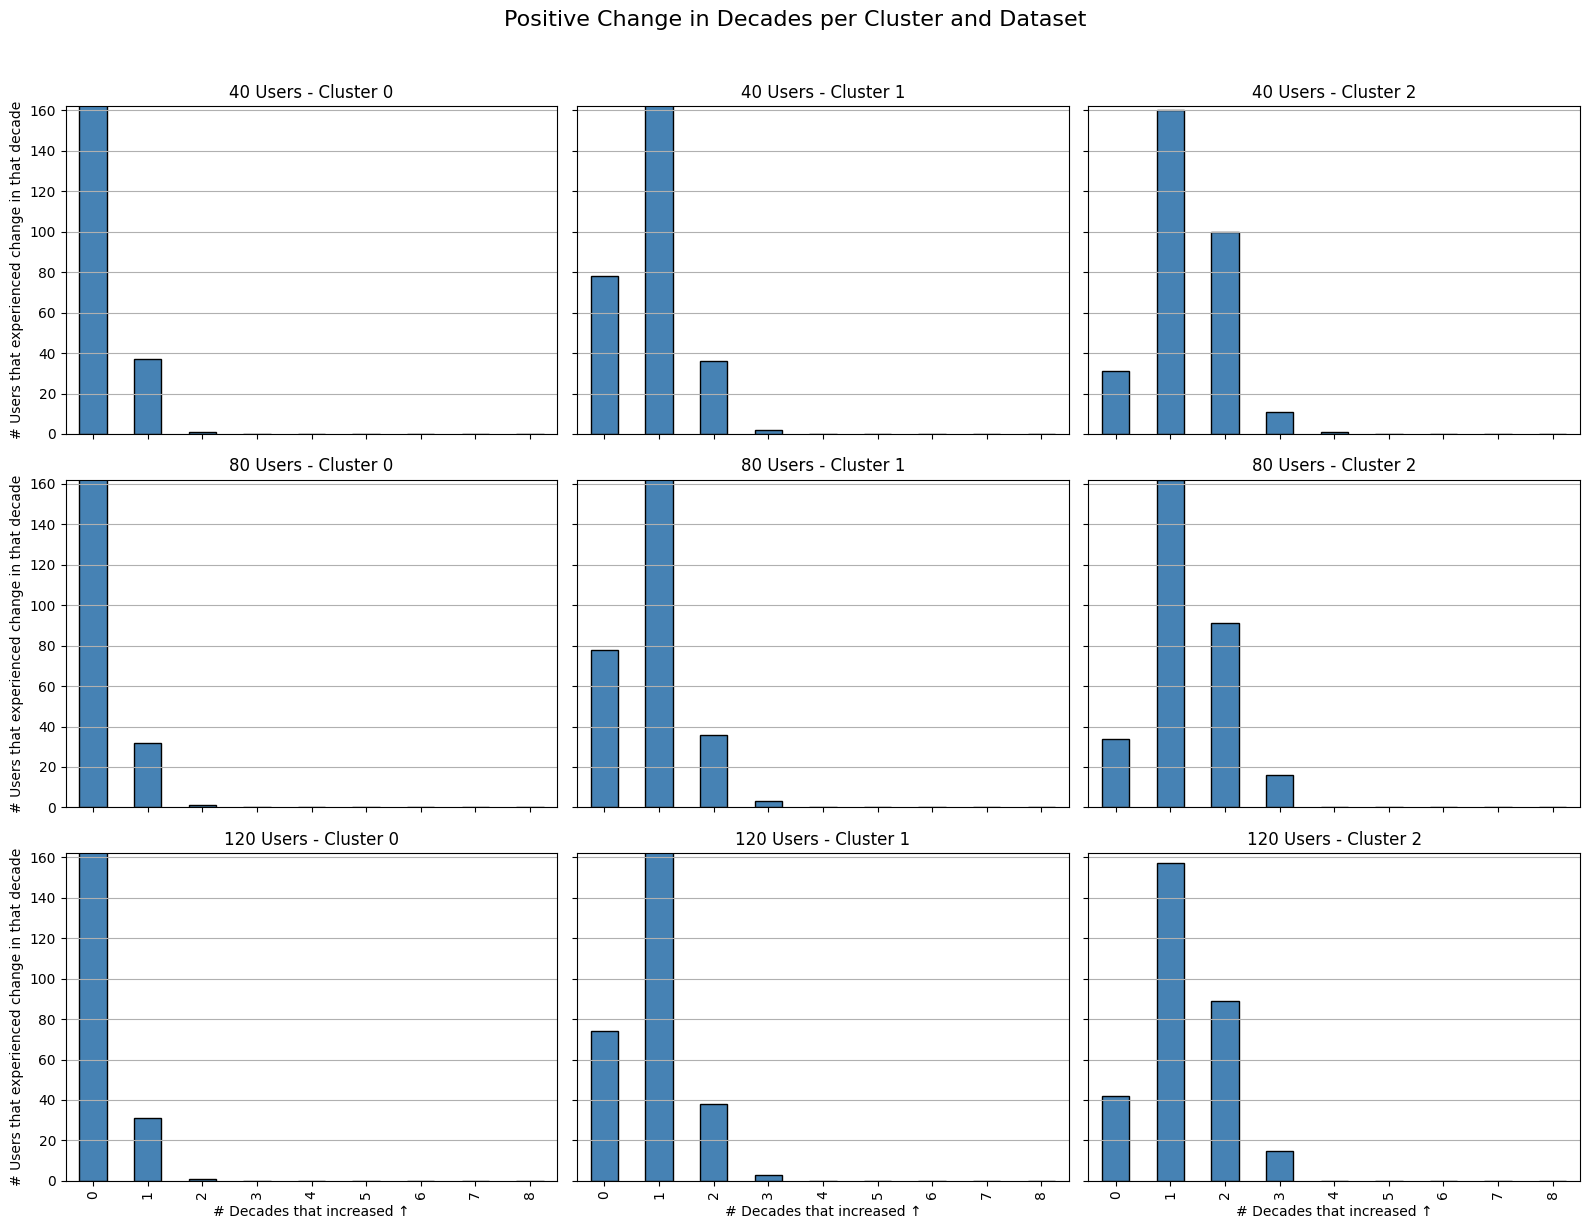

✅ Plot saved to: ../result/cluster_histograms.png


In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# Paths
base_path = "../result"
user_entropy_path = "../preprocessing/user_entropy.csv"
save_path = f"{base_path}/cluster_histograms.png"

# Load user-cluster info
user_entropy = pd.read_csv(user_entropy_path)

# Load percent change tables
percent_files = {
    "40 Users": pd.read_csv(f"{base_path}/percent_change_40.csv", index_col="user_id"),
    "80 Users": pd.read_csv(f"{base_path}/percent_change_80.csv", index_col="user_id"),
    "120 Users": pd.read_csv(f"{base_path}/percent_change_120.csv", index_col="user_id"),
}

# Setup plot
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12), sharex=True, sharey=True)
clusters = [0, 1, 2]
all_bins = range(9)  # 0 to 8 decades

for row_idx, (bias_label, df) in enumerate(percent_files.items()):
    for col_idx, cluster_id in enumerate(clusters):
        # Filter users in this cluster
        cluster_users = user_entropy[user_entropy['cluster'] == cluster_id]['user_id']
        cluster_df = df.loc[df.index.intersection(cluster_users)]

        # Count number of decades with positive change
        pos_counts = (cluster_df > 0).sum(axis=1)

        # Force X-axis to always show 0–8 by reindexing
        count_series = pos_counts.value_counts().reindex(all_bins, fill_value=0)

        # Plot
        ax = axes[row_idx, col_idx]
        count_series.plot(kind='bar', ax=ax, color='steelblue', edgecolor='black')
        ax.set_title(f"{bias_label} - Cluster {cluster_id}")
        ax.set_xlabel("# Decades that increased ↑")
        ax.set_ylabel("# Users that experienced change in that decade")
        ax.set_ylim(0, count_series.max() + 5)
        ax.set_xticks(range(9))
        ax.set_xticklabels(range(9))
        ax.grid(axis='y')

plt.suptitle("Positive Change in Decades per Cluster and Dataset", fontsize=16, y=1.02)
plt.tight_layout()
plt.savefig(save_path, dpi=300)
plt.show()

print(f"✅ Plot saved to: {save_path}")


In [110]:
from sklearn.metrics import ndcg_score
import numpy as np

# Function to calculate Precision@k
def precision_at_k(actual, predicted, k=10):
    relevant_items = set(actual)
    recommended_items = set(predicted[:k])
    return len(relevant_items & recommended_items) / k

# Function to calculate Recall@k
def recall_at_k(actual, predicted, k=10):
    relevant_items = set(actual)
    recommended_items = set(predicted[:k])
    return len(relevant_items & recommended_items) / len(relevant_items)

# Function to calculate Hit Rate@k
def hit_rate_at_k(actual, predicted, k=10):
    relevant_items = set(actual)
    recommended_items = set(predicted[:k])
    return 1 if len(relevant_items & recommended_items) > 0 else 0

# Function to calculate Jaccard Similarity between two sets
def jaccard_similarity(set1, set2):
    return len(set1 & set2) / len(set1 | set2)

# Example: Compare recommendations for a sample user
actual_items = [276, 474, 732, 423, 403]  # Example: Actual items the user rated
predicted_items_df_final = [423, 403, 732, 276, 357]  # Predicted by df_final
predicted_items_df_40 = [732, 474, 582, 276, 515]  # Predicted by df_40

# Calculate Precision@10 and Recall@10 for df_final and df_40
precision_df_final = precision_at_k(actual_items, predicted_items_df_final, k=5)
recall_df_final = recall_at_k(actual_items, predicted_items_df_final, k=5)

precision_df_40 = precision_at_k(actual_items, predicted_items_df_40, k=5)
recall_df_40 = recall_at_k(actual_items, predicted_items_df_40, k=5)

# Jaccard Similarity between predictions of df_final and df_40
jaccard_score = jaccard_similarity(set(predicted_items_df_final), set(predicted_items_df_40))

print(f"Precision@5 for df_final: {precision_df_final:.4f}")
print(f"Recall@5 for df_final: {recall_df_final:.4f}")
print(f"Precision@5 for df_40: {precision_df_40:.4f}")
print(f"Recall@5 for df_40: {recall_df_40:.4f}")
print(f"Jaccard Similarity between df_final and df_40: {jaccard_score:.4f}")


Precision@5 for df_final: 0.8000
Recall@5 for df_final: 0.8000
Precision@5 for df_40: 0.6000
Recall@5 for df_40: 0.6000
Jaccard Similarity between df_final and df_40: 0.2500


Cross-Validation vs Train-Test Split:
The first code uses cross-validation (cross_validate function from Surprise library), which splits the data into training and testing sets multiple times (in this case, 5 times). The model is trained and evaluated on each split, and the average performance metrics (RMSE, MAE) are calculated.
The second code uses a single train-test split (train_test_split function from Surprise library), where the data is split into training and testing sets only once. The model is trained on the training set and evaluated on the testing set.

In [111]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate
import pandas as pd

# Step 1: Load datasets

reader = Reader(rating_scale=(0, 5))
data_943k = Dataset.load_from_df(df_final[['user_id', 'item_id', 'rating']], reader)
data_983k = Dataset.load_from_df(df_40[['user_id', 'item_id', 'rating']], reader)

# Step 2: Define model (same for both)
model_943k = SVD()
model_983k = SVD()

# Step 3: Cross-validation
results_943k = cross_validate(model_943k, data_943k, measures=['RMSE', 'MAE'], cv=5, verbose=False)
results_983k = cross_validate(model_983k, data_983k, measures=['RMSE', 'MAE'], cv=5, verbose=False)

# Step 4: Compute average scores
avg_rmse_943k = sum(results_943k['test_rmse']) / len(results_943k['test_rmse'])
avg_mae_943k = sum(results_943k['test_mae']) / len(results_943k['test_mae'])

avg_rmse_983k = sum(results_983k['test_rmse']) / len(results_983k['test_rmse'])
avg_mae_983k = sum(results_983k['test_mae']) / len(results_983k['test_mae'])

# Step 5: Print comparison
print("📊 Cross-Validation Results (5-fold)")
print(f"Original 943k → RMSE: {avg_rmse_943k:.4f}, MAE: {avg_mae_943k:.4f}")
print(f"Biased 983k  → RMSE: {avg_rmse_983k:.4f}, MAE: {avg_mae_983k:.4f}")


📊 Cross-Validation Results (5-fold)
Original 943k → RMSE: 0.9354, MAE: 0.7372
Biased 983k  → RMSE: 0.9016, MAE: 0.6913


✅ Step 2: Train on All 100k Data & Recommend Top-10 Items per User

In [112]:
# Search for user_id 196
user_196_df = df_final[df_final['user_id'] == 196]

# Display the results
print(user_196_df)

       user_id  item_id  rating  decade
0          196      242       3  1990.0
940        196      393       4  1990.0
1133       196      381       4  1990.0
1812       196      251       3  1990.0
1896       196      655       5  1980.0
2374       196       67       5  1990.0
6910       196      306       4  1990.0
7517       196      238       4  1980.0
7842       196      663       5  1970.0
10017      196      111       4  1990.0
10254      196      580       2  1990.0
10981      196       25       4  1990.0
13733      196      286       5  1990.0
14606      196       94       3  1990.0
16834      196      692       5  1990.0
17102      196        8       5  1990.0
17830      196      428       4  1970.0
18853      196     1118       4  1970.0
21605      196       70       3  1990.0
22271      196       66       3  1990.0
22773      196      257       2  1990.0
23189      196      108       4  1990.0
24030      196      202       3  1990.0
25726      196      340       3  1990.0


In [115]:
# Step 1: Train Model B on full 101k dataset
trainset_101k = data_101k.build_full_trainset()
model_b = SVD()
model_b.fit(trainset_101k)

# Step 2: Use the same users from df_final (100k), and items from 101k
test_users = df_final['user_id'].unique()
all_items_101k = df_101_SVD['item_id'].unique()

# Step 3: Items already rated by test users (from df_final)
user_rated_items = df_final.groupby('user_id')['item_id'].apply(set).to_dict()

# Step 4: Predict on unseen items and get Top-10
top_10_recommendations_b = defaultdict(list)

for uid in test_users:
    seen = user_rated_items.get(uid, set())
    unseen = [iid for iid in all_items_101k if iid not in seen]

    ‍predictions = [(iid, model_b.predict(uid, iid).est) for iid in unseen]
    top_10 = sorted(predictions, key=lambda x: x[1], reverse=True)[:10]
    top_10_recommendations_b[uid] = top_10

# Step 5: Convert to DataFrame
top_10_b_df = pd.DataFrame([
    [uid, iid, pred] for uid, recs in top_10_recommendations_b.items() for iid, pred in recs
], columns=['User ID', 'Recommended Item', 'Predicted Rating'])

# Save the recommendations
top_10_b_df.to_csv("B-top10_recommendations_101k.csv", index=False)
print("✅ B - Top-10 recommendations from 101k saved.")

SyntaxError: invalid non-printable character U+200D (4225346966.py, line 20)

Evaluation

✅ 1. Hit Rate
Definition: Fraction of users for whom at least 1 of the Top-10 recommended items was actually rated.

In [116]:
# Load Top-10s if needed
top10_A_df = pd.read_csv("A-top10_recommendations_100k.csv")
top10_B_df = pd.read_csv("B-top10_recommendations_101k.csv")

# Ground truth (actual user ratings in 100k)
ground_truth = df_final.copy()

# Build lookup: items each user actually rated
user_actual_items = ground_truth.groupby('user_id')['item_id'].apply(set).to_dict()

FileNotFoundError: [Errno 2] No such file or directory: 'A-top10_recommendations_100k.csv'

✅ 2. Precision@10
Definition: For each user, how many of the Top-10 recommendations were actually rated?
Then average across users.

In [ ]:
def compute_precision_at_10(top_10_df, user_actual_items):
    precision_sum = 0
    total_users = top_10_df['User ID'].nunique()

    for user, group in top_10_df.groupby('User ID'):
        rec_items = set(group['Recommended Item'])
        actual_items = user_actual_items.get(user, set())
        true_positives = len(rec_items & actual_items)
        precision_sum += true_positives / 10  # Top-10 list
        
    return precision_sum / total_users

✅ 3. Recommendation Overlap
Definition: For each user, compute overlap between Top-10 items from Model A and B.